# Data Science & Machine Learning Bootcamp Project Content (Veri Bilimi Okulu - Miull)

# Overview

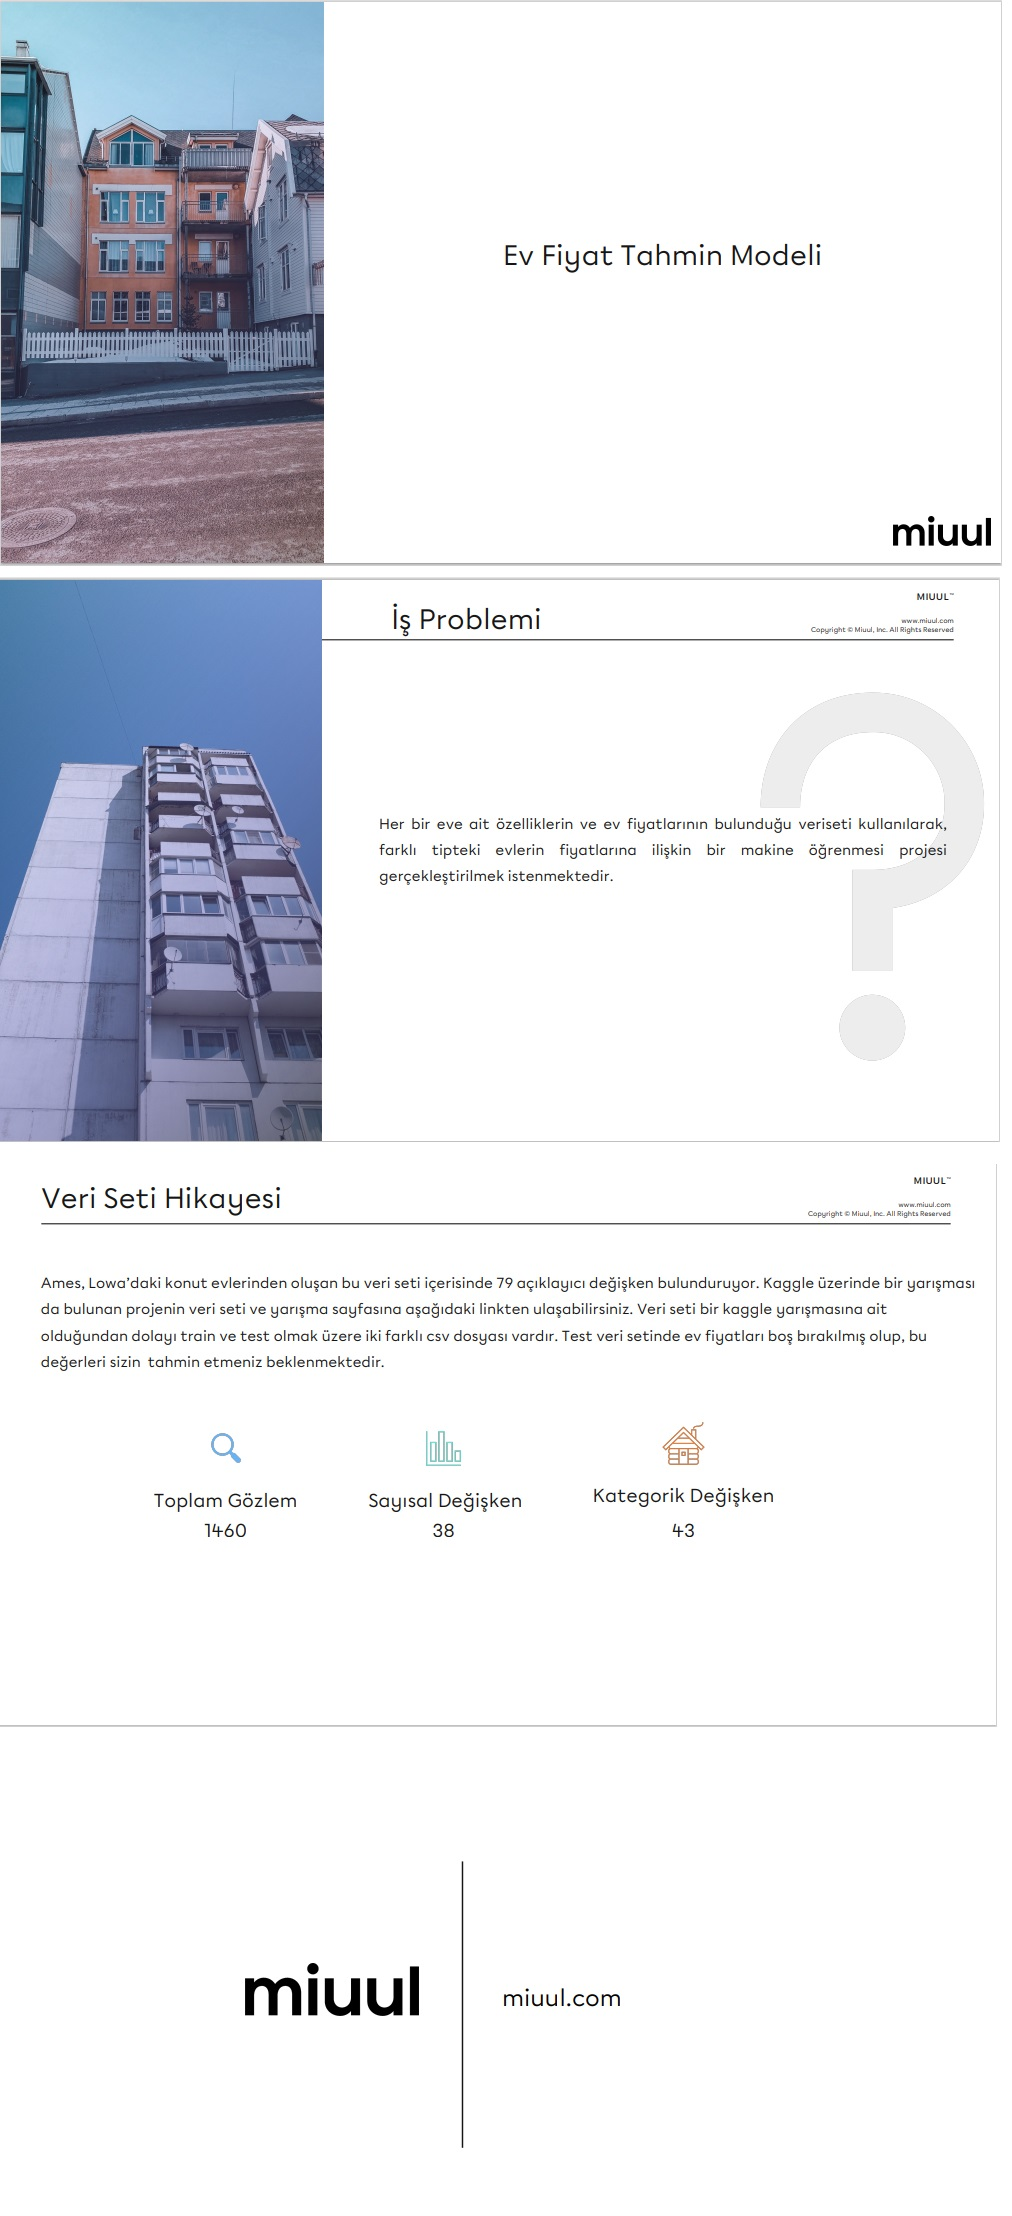

In [1]:
from IPython.display import Image
Image("proje_icerigi.jpg")


# Ev Fiyat Tahmin Modeli

### İş Problemi 

>Her bir eve ait özelliklerin ve ev fiyatlarının bulunduğu veriseti kullanılarak,
farklı tipteki evlerin fiyatlarına ilişkin bir makine öğrenmesi projesi
gerçekleştirilmek istenmektedir.

### Veri Seti Hikayesi

>Ames, Lowa’daki konut evlerinden oluşan bu veri seti içerisinde 79 açıklayıcı değişken bulunduruyor. Kaggle üzerinde bir yarışması da bulunan projenin veri seti ve yarışma sayfasına aşağıdaki linkten ulaşabilirsiniz. Veri seti bir kaggle yarışmasına ait olduğundan dolayı train ve test olmak üzere iki farklı csv dosyası vardır. Test veri setinde ev fiyatları boş bırakılmış olup, bu değerleri sizin tahmin etmeniz beklenmektedir.



1. Toplam Gözlem      :1460

2. Sayısal Değişken   :38

3. Kategorik Değişken :43

### Görev
>Elimizdeki veri seti üzerinden minimum hata ile ev fiyatlarını tahmin eden bir makine öğrenmesi modeli geliştiriniz.


# House Prices: EDA to ML
1. Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Missing Observation Analysis
4. Encoding
5. Outlier Analysis
6. Correlation Analysis
7. Scaler
8. Hyperparameter Optimization with RandomSearchCV
9. Models
10. Artficial Neural Network
11. Models Comparison
12. Conculusion


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV,ElasticNet
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve,KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor


#import import_ipynb
#from m_yazici11 import *

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Auxiliary Functions

In [4]:
def grab_col_names(dataframe):
    df=dataframe
    cat_th=len(dataframe)//20
    car_th=len(dataframe)//20
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols_object = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols_object + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    

#     print(f"Observations: {dataframe.shape[0]}")
#     print(f"Variables: {dataframe.shape[1]}","\n")
#     print(f'cat_cols: {len(cat_cols)}'," ---- ",cat_cols,"\n")
#     print(f'num_cols: {len(num_cols)}'," ---- ",num_cols,"\n")
#     print(f'cat_but_car: {len(cat_but_car)}'," ---- ",cat_but_car,"\n")
#     print(f'num_but_cat: {len(num_but_cat)}'," ---- ",num_but_cat)

    dfx=pd.DataFrame(np.zeros((len(dataframe.columns), 5)),columns=["cat_cols","num_cols","cat_but_car","num_but_cat","cat_cols_object"])
    dfx.loc[:]="- - -"
    dfx.loc[0]=[len(cat_cols),len(num_cols),len(cat_but_car),len(num_but_cat),len(cat_cols_object)]
    dfx.loc[range(2,len(cat_cols)+2),"cat_cols"]=cat_cols
    dfx.loc[range(2,len(num_cols)+2),"num_cols"]=num_cols
    dfx.loc[range(2,len(cat_but_car)+2),"cat_but_car"]=cat_but_car
    dfx.loc[range(2,len(num_but_cat)+2),"num_but_cat"]=num_but_cat
    dfx.loc[range(2,len(cat_cols_object)+2),"cat_cols_object"]=cat_cols_object
    
    if len(cat_cols)>len(num_cols):
        print(dfx.iloc[:len(cat_cols)+2])
    else:
        print(dfx.iloc[:len(num_cols)+2])
    return cat_cols, num_cols, cat_but_car,cat_cols_object,dfx

#cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df)

In [5]:
def cat_summary2(dataframe,col_name,plot=False,
                fig_size=5,
                print_first_x_rows=10):
    """
    Veri setindeki değişkenlerin değerlerinin kaç tane var olduğunu ve oranını gösterir 
    
    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir
    col_name: str
        dataframe'e ait kolon isimleri
    plot: bool
        Çizim yapılıp yapılmamasına karar verir
    added_new_features_for_figsize: int
        Çizim yapılacaksa resim büyüklüğünü ayarlar
    
    Returns
    -------
        
    Notes
    -------
    Çok büyük veri göndermek çıktının gecikmesine sebep olacaktır.
    
    Examples
    --------
    for col in df.columns:
        if df[col].dtypes=="bool":
            df[col]=df[col].astype(int)
        cat_summary(df,col,plot=True,added_new_features_for_figsize=4)
    
    """ 
    size=fig_size
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows],
                       "Ratio": 100*dataframe[col_name].value_counts(dropna=False).iloc[:print_first_x_rows]/len(dataframe)}))
    
    print("-"*99)
    if plot:
        plt.rcParams['figure.figsize']=(size,size)
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show(block=True)
    print("#"*99)

    
###########################################################################################################################
def cat_summary(dataframe,cat_cols,plot=True,fig_size=4,print_first_x_rows=10)  :
    if type(cat_cols)==str:
        cat_summary2(dataframe,cat_cols,plot,fig_size,print_first_x_rows)
    else:    
        #for col in dataframe.columns:
        for col in cat_cols:
            #pd.concat([dataframe[col].value_counts(dropna=False,normalize=True),dataframe[col].value_counts(dropna=False)],axis=1)*100
            # bool olanda hata vermesin diye. aslında dataframe e ilk başta bunu uygulamak daha mantıklı
            if dataframe[col].dtypes=="bool":
                dataframe[col]=dataframe[col].astype(int)
            cat_summary2(dataframe,col,plot,fig_size,print_first_x_rows)
        
        
        

In [6]:
def check_df(dataframe,head=5):
    
    """
    Veri setine genel bir bakış atmak için kullanılır.
    
    Parameters
    ----------
    dataframe: dataframe
        Değişken isimleri alınmak istenen dataframe'dir
    head: int
        İlk ve son kaç satır gözlenmek istendiğini belirtir
    
    Returns
    -------
        
    Notes
    -------
    
    Examples
    --------
    
    
    """    
    
    print("\n##########################################################  Shape  ##########################################################\n")
    pprint(dataframe.shape)
    
    print("\n##########################################################  Types  ##########################################################\n")
    pprint(dataframe.dtypes)
    
#     print("\n##########################################################  Head  ##########################################################\n")
#     pprint(dataframe.head(head))
    
#     print("\n##########################################################  Tail  ##########################################################\n")
#     pprint(dataframe.tail(head))
    
#     print("\n##########################################################  NA  ##########################################################\n")
#     pprint(dataframe.isnull().sum().sort_values())
    
#     print("\n##########################################################  Quantiles  ##########################################################\n")
#     pprint(dataframe.describe([0.01,0.05,0.25,0.75,0.95,0.99])
#     print("\n##########################################################  -------  ##########################################################\n")
    
#check_df(df,head=5)

In [7]:
def find_mean_to_target_mean_diff(df,df_modes_all,col,target):
    df_modes_less_than_target_mean=df_modes_all[df_modes_all[col]<df[target].mean()]
    df_modes_greater_than_target_mean=df_modes_all[df_modes_all[col]>df[target].mean()]
    target_mean=df[target].mean()
    
    df_modes_all[col+"_diff"]=0
    df_modes_all.loc[df_modes_less_than_target_mean.index,(col+"_diff")]=(1-(df_modes_less_than_target_mean[col].values/target_mean))
    df_modes_all.loc[df_modes_greater_than_target_mean.index,(col+"_diff")]=(((df_modes_greater_than_target_mean[col].values)-target_mean)/(1-target_mean))
    return df_modes_all
# col="target_mean"
# col_number=3
# find_mean_to_target_mean_diff(df,df_modes_all,"target_mean",3,target)

In [8]:
def find_col_modes(df,col,target):
    col_df_modes=pd.concat([df[col].value_counts(dropna=False,normalize=True),  # modes_rate
                            df[col].value_counts(dropna=False),],axis=1)  # modes_count

    col_df_modes.columns=["modes_rate","modes_count"]  # değişkenlere isimler atıyorum

    col_df_modes["modes"]=col_df_modes.index  #index te olan mode ları değişken olarak atıyorum

    col_df_modes2=df.groupby([col]).agg({target:["mean"] })
    col_df_modes2.columns=["target_mean"]
    col_df_modes2["modes"]=col_df_modes2.index
    col_df_modes2  # hedef değişkene ait mean değerlerinden yeni bir df oluşturuyorum

    col_df_modes=col_df_modes.merge(col_df_modes2, on="modes") # oluşan iki df i birleştiriyorum
    col_df_modes

    # değişkenleri istediğim sıraya göre yeniden sıralıyorum
    col_df_modes=col_df_modes[["modes","target_mean","modes_rate","modes_count"]] 

    col_df_modes["dtypes"]=df[col].dtypes
    col_df_modes["col_isna_rate"]=df[col].isna().sum()/len(df)
    col_df_modes["col_notna_rate"]=df[col].notna().sum()/len(df)
    col_df_modes["nunique"]=df[col].nunique()
    col_df_modes["uniques"]=str(df[col].unique())

    return col_df_modes
# col_df_modes=find_col_modes(df,col=cat_cols[0],target=target)
# col_df_modes

In [9]:
def col_df_modes_all_fonk(df,col,target):
    
    col_df_modes_all=pd.DataFrame()
    for col in df.columns:
        if (df[col].nunique()<len(df)//20) and col !=target:
            col_df_modes=find_col_modes(df,col=col,target=target)
            col_df_modes["col"]=col
            col_df_modes_all=pd.concat([col_df_modes_all,col_df_modes],axis=0)
            col_df_modes_all.index=range(len(col_df_modes_all))
    
   
    
    col_df_modes_all=find_mean_to_target_mean_diff(df,col_df_modes_all,"target_mean",target)
    col_df_modes_all=col_df_modes_all[['col','modes', 'target_mean', 'target_mean_diff' , 'modes_rate', 'modes_count', 'dtypes', 'col_isna_rate', 'col_notna_rate', 'nunique', 'uniques']]
    
    return col_df_modes_all

# col_df_modes_all=col_df_modes_all_fonk(df,col=cat_cols[0],target=target)
# col_df_modes_all

In [10]:
# def find_mean_to_target_mean_diff(df,df_modes_all,col,target):
#     df_modes_less_than_target_mean=df_modes_all[df_modes_all[col]<df[target].mean()]
#     df_modes_greater_than_target_mean=df_modes_all[df_modes_all[col]>df[target].mean()]
#     target_mean=df[target].mean()
    
#     df.insert(3, (col+"_diff"))
#     df_modes_all.loc[df_modes_less_than_target_mean.index,(col+"_diff")]=(1-(df_modes_less_than_target_mean[col].values/target_mean))
#     df_modes_all.loc[df_modes_greater_than_target_mean.index,(col+"_diff")]=(((df_modes_greater_than_target_mean[col].values)-target_mean)/(1-target_mean))
#     return df_modes_all

In [11]:
def outlier_thresholds(dataframe, col_name, q1=0.03, q3=0.97):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# outlier_thresholds(df, "colname", q1=0.03, q3=0.97)

In [12]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [13]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

# grab_outliers(df, "tenure")

In [14]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

# for col in num_cols:
#     new_df = remove_outlier(df, col)

In [15]:
def replace_with_thresholds(dataframe, variable):
    #hata: buraya oran orantı ile thresoldları ata. tek sayı ile değiştirme  #!!!!!!!!!!!!!!!!!!!!!!!!!!
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# outlier_thresholds(df, "col_name")
# check_outlier(df, "col_name")
# grab_outliers(df, "col_name", index=True)

# remove_outlier(df, "col_name").shape
# replace_with_thresholds(df, "col_name")
# check_outlier(df, "col_name")

In [16]:
#############################################
# Missing Values (Eksik Değerler)
#############################################

#############################################
# Eksik Değerlerin Yakalanması/Analiz edilmesi
#############################################
def df_nan_func(df, target):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    df_nan = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
   
    df_nan["isna_mean"]=0
    df_nan["notna_mean"]=0
    for col in df_nan.index:
        if col!=target:
            df_nan.loc[col,"isna_mean"]=df.loc[df[col].isna(),target].mean()
            df_nan.loc[col,"notna_mean"]=df.loc[df[col].notna(),target].mean()
    
    df_nan["isna_mean_diff%"]=0
    df_nan.loc[df_nan[df_nan["isna_mean"]<df[target].mean()].index,"isna_mean_diff%"]=1-(df_nan[df_nan["isna_mean"]<df[target].mean()]["isna_mean"].values/df[target].mean())
    df_nan.loc[df_nan[df_nan["isna_mean"]>df[target].mean()].index,"isna_mean_diff%"]=(((df_nan[df_nan["isna_mean"]>df[target].mean()]["isna_mean"].values)-df[target].mean())/(1-df[target].mean()))
    
    df_nan["notna_mean_diff%"]=0
    df_nan.loc[df_nan[df_nan["notna_mean"]<dataframe[target].mean()].index,"notna_mean_diff%"]=1-(df_nan[df_nan["notna_mean"]<dataframe[target].mean()]["notna_mean"].values/dataframe[target].mean())
    df_nan.loc[df_nan[df_nan["notna_mean"]>dataframe[target].mean()].index,"notna_mean_diff%"]=(((df_nan[df_nan["notna_mean"]>dataframe[target].mean()]["notna_mean"].values)-dataframe[target].mean())/(1-dataframe[target].mean()))

    df_nan["na_diff_abs"]=abs(df_nan["isna_mean_diff%"]-df_nan["notna_mean_diff%"])
    return df_nan
# na_cols =df_nan_func(df, target)
# #na_cols

In [17]:
def yzc():
    print(
    
    """
    -------------------------------------------------------------------------------------------------
    df.info()
    df.describe([0.01,0.05,0.25,0.75,0.95,0.99])
    -------------------------------------------------------------------------------------------------
    df_nan =df_nan_func(df, target)
    -------------------------------------------------------------------------------------------------
    cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df.drop(["Id"],axis=1))
    -------------------------------------------------------------------------------------------------
    cat_summary(dataframe,cat_cols,plot=True,fig_size=4,print_first_x_rows=10)
    -------------------------------------------------------------------------------------------------
    df_modes=find_col_modes(df,col=cat_cols[0],target=target)
    df_modes_all=col_df_modes_all_fonk(df,col=cat_cols,target=target)
    -------------------------------------------------------------------------------------------------
    outlier_thresholds(df, "col_name", q1=0.03, q3=0.97)
    check_outlier(df, "col_colname")
    grab_outliers(df, "col_name", index=True)
    -------------------------------------------------------------------------------------------------
    remove_outlier(df, "col_name").shape
    replace_with_thresholds(df, "col_name")
    check_outlier(df, "col_name")
    -------------------------------------------------------------------------------------------------
    """
    )

# Let's Start

# Exploratory Data Analysis (EDA)

In [18]:
df_copy=pd.read_csv("train.csv")

In [19]:
df=df_copy.copy()

In [20]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854   
1        2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0   
2        3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866   
3        4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756   
4        5          60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053   
...    ...         ...      ...          ...      ...    ...   ...      ...         ...       ...       ...       ...          ...        ...        ...      ...        ...          ...          ...        ...           ...       ...      ...         ...         ...        ...         ...       ...       ...        ...      ...      ...          ...          ...         ...          ...         ...        ...          ...     ...       ...        ...        ...       ...       ...   
1455  1456          60       RL       62.000     7917   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            5       1999          2000     Gable  CompShg     VinylSd     VinylSd       None       0.000        TA        TA      PConc       Gd       TA           No          Unf           0          Unf           0        953          953    GasA        Ex          Y      SBrkr       953       694   
1456  1457          20       RL       85.000    13175   Pave   NaN      Reg         Lvl    AllPu

In [21]:
target="SalePrice"

In [22]:
df_Id=df[["Id"]]
df=df.drop(["Id"],axis=1)
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0   
1             20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0   
2             60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0   
3             70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0   
4             60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053             0   
...          ...      ...          ...      ...    ...   ...      ...         ...       ...       ...       ...          ...        ...        ...      ...        ...          ...          ...        ...           ...       ...      ...         ...         ...        ...         ...       ...       ...        ...      ...      ...          ...          ...         ...          ...         ...        ...          ...     ...       ...        ...        ...       ...       ...           ...   
1455          60       RL       62.000     7917   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            5       1999          2000     Gable  CompShg     VinylSd     VinylSd       None       0.000        TA        TA      PConc       Gd       TA           No          Unf           0          Unf           0        953          953    GasA        Ex          Y      SBrkr       953       694             0   
1456          20       RL     

In [23]:
df[df[target]<=0]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

### SalePrice: the variable we're trying to predict

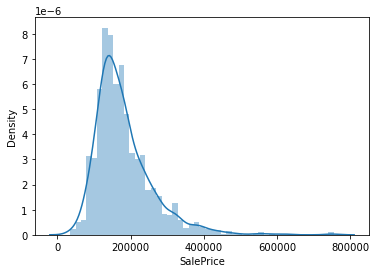

In [24]:
#histogram
sns.distplot(df['SalePrice']);

In [25]:
df[target]=df[target]/abs(df[target]).max()
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0   
1          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0   
2          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0   
3          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0   
4          60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2003.000          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal      0.276  
1       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn           2         460         TA         

In [26]:
df[target].mean()

0.23963072303365682

In [27]:
df[target].median()

0.21589403973509932

In [1]:
import import_ipynb
from m_yazici import *

importing Jupyter notebook from m_yazici.ipynb


In [2]:
deneme(6)

36


In [28]:
yzc()


    -------------------------------------------------------------------------------------------------
    df.info()
    df.describe([0.01,0.05,0.25,0.75,0.95,0.99])
    -------------------------------------------------------------------------------------------------
    df_nan =df_nan_func(df, target)
    -------------------------------------------------------------------------------------------------
    cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df.drop(["Id"],axis=1))
    -------------------------------------------------------------------------------------------------
    cat_summary(dataframe,cat_cols,plot=True,fig_size=4,print_first_x_rows=10)
    -------------------------------------------------------------------------------------------------
    df_modes=find_col_modes(df,col=cat_cols[0],target=target)
    df_modes_all=col_df_modes_all_fonk(df,col=cat_cols,target=target)
    ------------------------------------------------------------------------------

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [30]:
df.describe([0.01,0.05,0.25,0.75,0.95,0.99])

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal   MoSold   YrSold  SalePrice
count    1460.000     1201.000   1460.000     1460.000     1460.000   1460.000      1460.000    1452.000    1460.000    1460.000   1460.000     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000      1460.000  1460.000  1460.000      1460.000      1460.000      1460.000    1460.000     1379.000    1460.000    1460.000    1460.000     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000 1460.000 1460.000   1460.000
mean       56.897       70.050  10516.828        6.099        5.575   1971.268      1984.866     103.685     443.640      46.549    567.240     1057.429  1162.627   346.992         5.845   1515.464         0.425         0.058     1.565     0.383         2.866         1.047         6.518       0.613     1978.506       1.767     472.980      94.245       46.660         21.954      3.410       15.061     2.759    43.489    6.322 2007.816      0.240
std        42.301       24.285   9981.265        1.383        1.113     30.203        20.645     181.066     456.098     161.319    441.867      438.705   386.588   436.528        48.623    525.480         0.519         0.239     0.551     0.503         0.816         0.220         1.625       0.645       24.690       0.747     213.805     125.339       66.256         61.119     29.317       55.757    40.177   496.123    2.704    1.328      0.105
min        20.000       21.000   1300.000        1.000        1.000   1872.000      1950.000       0.000       0.000       0.000      0.000        0.000   334.000     0.000         0.000    334.000         0.000         0.000     0.000     0.000         0.000         0.000         2.000       0.000     1900.000       0.000       0.000       0.000        0.000          0.000      0.000        0.000     0.000     0.000    1.000 2006.000      0.046
1%         20.000       21.000   1680.000        3.000        3.000   1899.180      1950.000       0.000       0.000       0.000      0.000        0.000   520.000     0.000         0.000    692.180         0.000         0.000     1.000     0.000         1.000         1.000         3.000       0.000     1916.000       0.000       0.000       0.000        0.000          0.000      0.000        0.000     0.000     0.000    1.000 2006.000      0.082
5%         20.000       34.000   3311.700        4.000        4.000   1916.000      1950.000       0.000       0.000       0.000      0.000      519.300   672.950     0.000         0.000    848.000         0.000         0.000     1.000     0.000         2.000         1.000         4.000       0.000     1930.000       0.000       0.000       0.000        0.000          0.000      0.000        0.000     0.000     0.000    2.000 2006.000      0.117
25%        20.000       59.000   7553.500        5.000        5.000   1954.000      1967.000       0.000       0.000       0.000    223.000      795.750   882.000     0.000         0.000   1129.500         0.000         0.000     1.000     0.000         2.000         1.000         5.000       0.000     1961.000       1.000     334.500       0.000        0.000          0.000      0.000        0.000     0.000     0.000    5.000 2007.000      0.172
50%        50.000       69.000   9478.500        6.000        5.000   1973.000      1994.000       0.000     383.500       0.000    477.500      991.500  1087.000     0.000         0.000   1464.000         0.000         0.000     2.000     0.000         3.000         1.000         6.000       1.000     1980.000       2.000     480.000       0.000       25.000          0.000      0.000        0.000     0.

In [31]:
cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df)

         cat_cols       num_cols cat_but_car   num_but_cat cat_cols_object
0              62             18           0            19              43
1           - - -          - - -       - - -         - - -           - - -
2        MSZoning    LotFrontage       - - -    MSSubClass        MSZoning
3          Street        LotArea       - - -   OverallQual          Street
4           Alley      YearBuilt       - - -   OverallCond           Alley
5        LotShape     MasVnrArea       - - -  YearRemodAdd        LotShape
6     LandContour     BsmtFinSF1       - - -  LowQualFinSF     LandContour
7       Utilities     BsmtFinSF2       - - -  BsmtFullBath       Utilities
8       LotConfig      BsmtUnfSF       - - -  BsmtHalfBath       LotConfig
9       LandSlope    TotalBsmtSF       - - -      FullBath       LandSlope
10   Neighborhood       1stFlrSF       - - -      HalfBath    Neighborhood
11     Condition1       2ndFlrSF       - - -  BedroomAbvGr      Condition1
12     Condition2      Gr

         MSZoning  Ratio
RL           1151 78.836
RM            218 14.932
FV             65  4.452
RH             16  1.096
C (all)        10  0.685
---------------------------------------------------------------------------------------------------


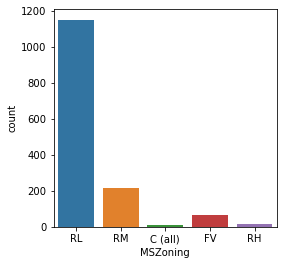

###################################################################################################
      Street  Ratio
Pave    1454 99.589
Grvl       6  0.411
---------------------------------------------------------------------------------------------------


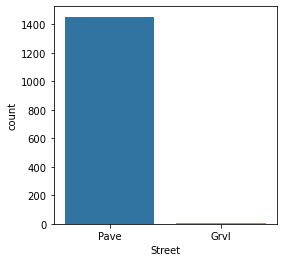

###################################################################################################
      Alley  Ratio
NaN    1369 93.767
Grvl     50  3.425
Pave     41  2.808
---------------------------------------------------------------------------------------------------


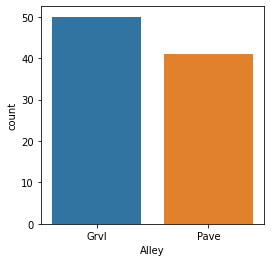

###################################################################################################
     LotShape  Ratio
Reg       925 63.356
IR1       484 33.151
IR2        41  2.808
IR3        10  0.685
---------------------------------------------------------------------------------------------------


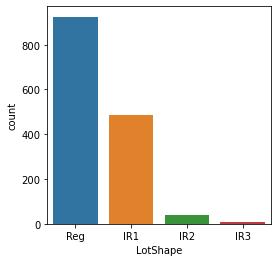

###################################################################################################
     LandContour  Ratio
Lvl         1311 89.795
Bnk           63  4.315
HLS           50  3.425
Low           36  2.466
---------------------------------------------------------------------------------------------------


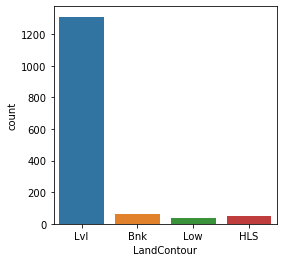

###################################################################################################
        Utilities  Ratio
AllPub       1459 99.932
NoSeWa          1  0.068
---------------------------------------------------------------------------------------------------


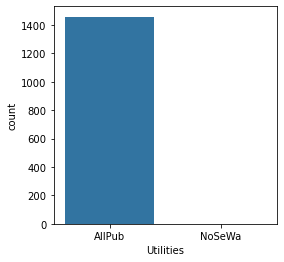

###################################################################################################
         LotConfig  Ratio
Inside        1052 72.055
Corner         263 18.014
CulDSac         94  6.438
FR2             47  3.219
FR3              4  0.274
---------------------------------------------------------------------------------------------------


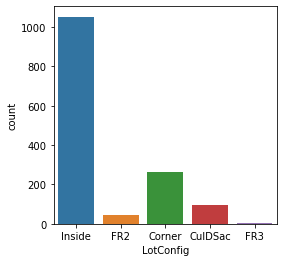

###################################################################################################
     LandSlope  Ratio
Gtl       1382 94.658
Mod         65  4.452
Sev         13  0.890
---------------------------------------------------------------------------------------------------


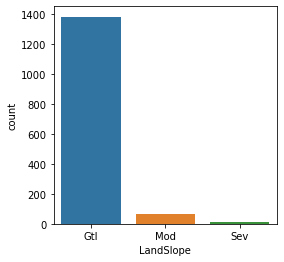

###################################################################################################
         Neighborhood  Ratio
NAmes             225 15.411
CollgCr           150 10.274
OldTown           113  7.740
Edwards           100  6.849
Somerst            86  5.890
Gilbert            79  5.411
NridgHt            77  5.274
Sawyer             74  5.068
NWAmes             73  5.000
SawyerW            59  4.041
---------------------------------------------------------------------------------------------------


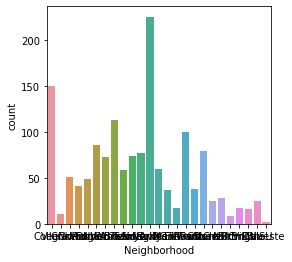

###################################################################################################
        Condition1  Ratio
Norm          1260 86.301
Feedr           81  5.548
Artery          48  3.288
RRAn            26  1.781
PosN            19  1.301
RRAe            11  0.753
PosA             8  0.548
RRNn             5  0.342
RRNe             2  0.137
---------------------------------------------------------------------------------------------------


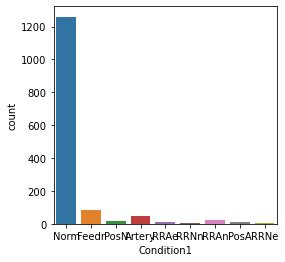

###################################################################################################
        Condition2  Ratio
Norm          1445 98.973
Feedr            6  0.411
Artery           2  0.137
RRNn             2  0.137
PosN             2  0.137
PosA             1  0.068
RRAn             1  0.068
RRAe             1  0.068
---------------------------------------------------------------------------------------------------


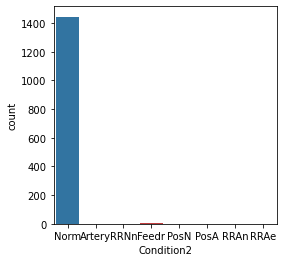

###################################################################################################
        BldgType  Ratio
1Fam        1220 83.562
TwnhsE       114  7.808
Duplex        52  3.562
Twnhs         43  2.945
2fmCon        31  2.123
---------------------------------------------------------------------------------------------------


###################################################################################################
        HouseStyle  Ratio
1Story         726 49.726
2Story         445 30.479
1.5Fin         154 10.548
SLvl            65  4.452
SFoyer          37  2.534
1.5Unf          14  0.959
2.5Unf          11  0.753
2.5Fin           8  0.548
---------------------------------------------------------------------------------------------------


###################################################################################################
         RoofStyle  Ratio
Gable         1141 78.151
Hip            286 19.589
Flat            13  0.890
Gambrel         11  0.753
Mansard          7  0.479
Shed             2  0.137
---------------------------------------------------------------------------------------------------


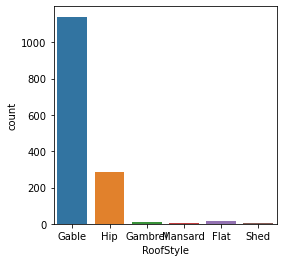

###################################################################################################
         RoofMatl  Ratio
CompShg      1434 98.219
Tar&Grv        11  0.753
WdShngl         6  0.411
WdShake         5  0.342
Metal           1  0.068
Membran         1  0.068
Roll            1  0.068
ClyTile         1  0.068
---------------------------------------------------------------------------------------------------


###################################################################################################
         Exterior1st  Ratio
VinylSd          515 35.274
HdBoard          222 15.205
MetalSd          220 15.068
Wd Sdng          206 14.110
Plywood          108  7.397
CemntBd           61  4.178
BrkFace           50  3.425
WdShing           26  1.781
Stucco            25  1.712
AsbShng           20  1.370
---------------------------------------------------------------------------------------------------


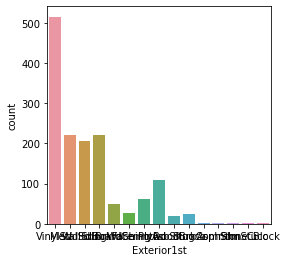

###################################################################################################
         Exterior2nd  Ratio
VinylSd          504 34.521
MetalSd          214 14.658
HdBoard          207 14.178
Wd Sdng          197 13.493
Plywood          142  9.726
CmentBd           60  4.110
Wd Shng           38  2.603
Stucco            26  1.781
BrkFace           25  1.712
AsbShng           20  1.370
---------------------------------------------------------------------------------------------------


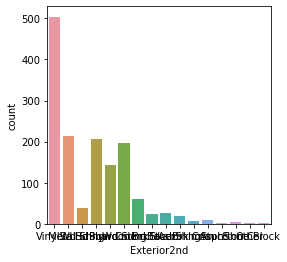

###################################################################################################
         MasVnrType  Ratio
None            864 59.178
BrkFace         445 30.479
Stone           128  8.767
BrkCmn           15  1.027
NaN               8  0.548
---------------------------------------------------------------------------------------------------


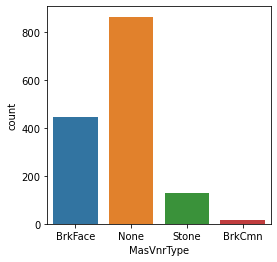

###################################################################################################
    ExterQual  Ratio
TA        906 62.055
Gd        488 33.425
Ex         52  3.562
Fa         14  0.959
---------------------------------------------------------------------------------------------------


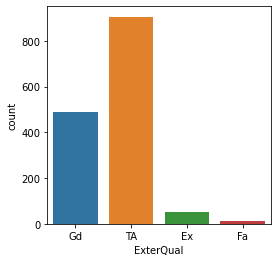

###################################################################################################
    ExterCond  Ratio
TA       1282 87.808
Gd        146 10.000
Fa         28  1.918
Ex          3  0.205
Po          1  0.068
---------------------------------------------------------------------------------------------------


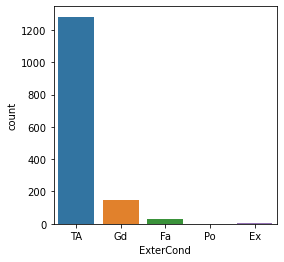

###################################################################################################
        Foundation  Ratio
PConc          647 44.315
CBlock         634 43.425
BrkTil         146 10.000
Slab            24  1.644
Stone            6  0.411
Wood             3  0.205
---------------------------------------------------------------------------------------------------


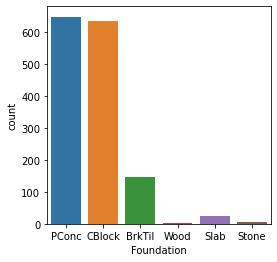

###################################################################################################
     BsmtQual  Ratio
TA        649 44.452
Gd        618 42.329
Ex        121  8.288
NaN        37  2.534
Fa         35  2.397
---------------------------------------------------------------------------------------------------


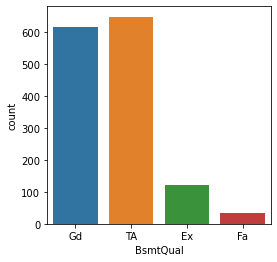

###################################################################################################
     BsmtCond  Ratio
TA       1311 89.795
Gd         65  4.452
Fa         45  3.082
NaN        37  2.534
Po          2  0.137
---------------------------------------------------------------------------------------------------


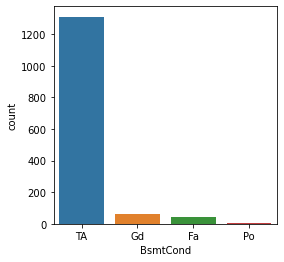

###################################################################################################
     BsmtExposure  Ratio
No            953 65.274
Av            221 15.137
Gd            134  9.178
Mn            114  7.808
NaN            38  2.603
---------------------------------------------------------------------------------------------------


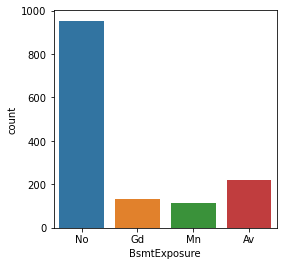

###################################################################################################
     BsmtFinType1  Ratio
Unf           430 29.452
GLQ           418 28.630
ALQ           220 15.068
BLQ           148 10.137
Rec           133  9.110
LwQ            74  5.068
NaN            37  2.534
---------------------------------------------------------------------------------------------------


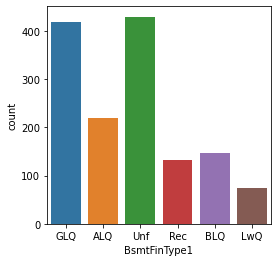

###################################################################################################
     BsmtFinType2  Ratio
Unf          1256 86.027
Rec            54  3.699
LwQ            46  3.151
NaN            38  2.603
BLQ            33  2.260
ALQ            19  1.301
GLQ            14  0.959
---------------------------------------------------------------------------------------------------


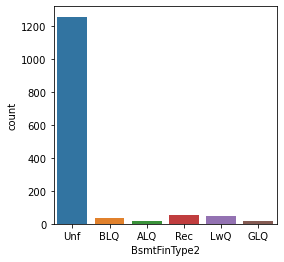

###################################################################################################
       Heating  Ratio
GasA      1428 97.808
GasW        18  1.233
Grav         7  0.479
Wall         4  0.274
OthW         2  0.137
Floor        1  0.068
---------------------------------------------------------------------------------------------------


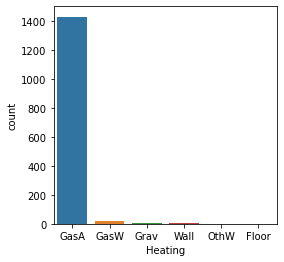

###################################################################################################
    HeatingQC  Ratio
Ex        741 50.753
TA        428 29.315
Gd        241 16.507
Fa         49  3.356
Po          1  0.068
---------------------------------------------------------------------------------------------------


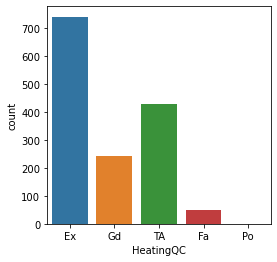

###################################################################################################
   CentralAir  Ratio
Y        1365 93.493
N          95  6.507
---------------------------------------------------------------------------------------------------


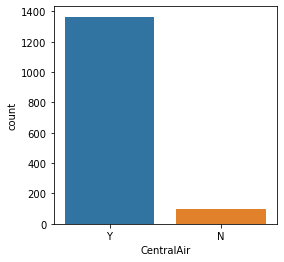

###################################################################################################
       Electrical  Ratio
SBrkr        1334 91.370
FuseA          94  6.438
FuseF          27  1.849
FuseP           3  0.205
Mix             1  0.068
NaN             1  0.068
---------------------------------------------------------------------------------------------------


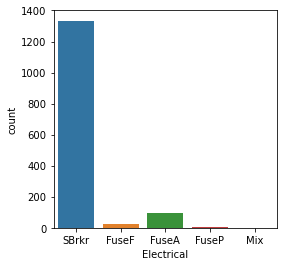

###################################################################################################
    KitchenQual  Ratio
TA          735 50.342
Gd          586 40.137
Ex          100  6.849
Fa           39  2.671
---------------------------------------------------------------------------------------------------


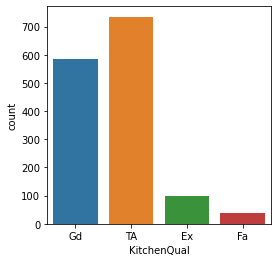

###################################################################################################
      Functional  Ratio
Typ         1360 93.151
Min2          34  2.329
Min1          31  2.123
Mod           15  1.027
Maj1          14  0.959
Maj2           5  0.342
Sev            1  0.068
---------------------------------------------------------------------------------------------------


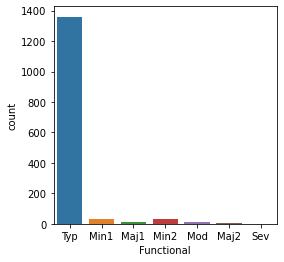

###################################################################################################
     FireplaceQu  Ratio
NaN          690 47.260
Gd           380 26.027
TA           313 21.438
Fa            33  2.260
Ex            24  1.644
Po            20  1.370
---------------------------------------------------------------------------------------------------


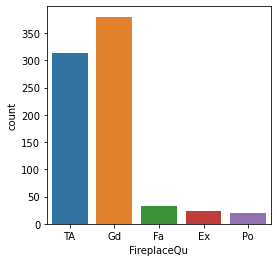

###################################################################################################
         GarageType  Ratio
Attchd          870 59.589
Detchd          387 26.507
BuiltIn          88  6.027
NaN              81  5.548
Basment          19  1.301
CarPort           9  0.616
2Types            6  0.411
---------------------------------------------------------------------------------------------------


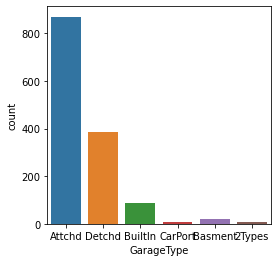

###################################################################################################
     GarageFinish  Ratio
Unf           605 41.438
RFn           422 28.904
Fin           352 24.110
NaN            81  5.548
---------------------------------------------------------------------------------------------------


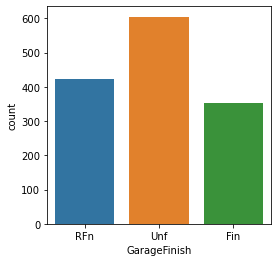

###################################################################################################
     GarageQual  Ratio
TA         1311 89.795
NaN          81  5.548
Fa           48  3.288
Gd           14  0.959
Ex            3  0.205
Po            3  0.205
---------------------------------------------------------------------------------------------------


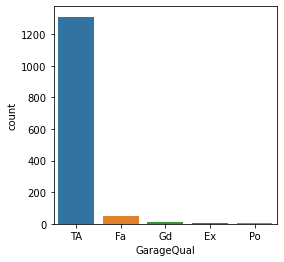

###################################################################################################
     GarageCond  Ratio
TA         1326 90.822
NaN          81  5.548
Fa           35  2.397
Gd            9  0.616
Po            7  0.479
Ex            2  0.137
---------------------------------------------------------------------------------------------------


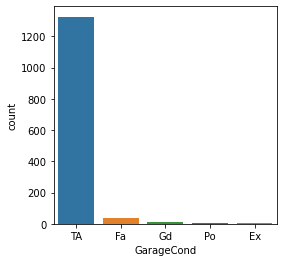

###################################################################################################
   PavedDrive  Ratio
Y        1340 91.781
N          90  6.164
P          30  2.055
---------------------------------------------------------------------------------------------------


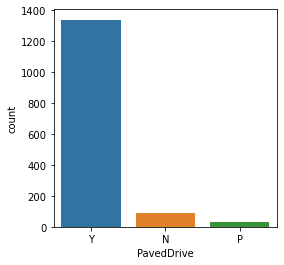

###################################################################################################
     PoolQC  Ratio
NaN    1453 99.521
Gd        3  0.205
Ex        2  0.137
Fa        2  0.137
---------------------------------------------------------------------------------------------------


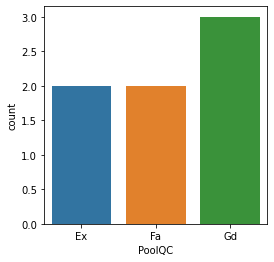

###################################################################################################
       Fence  Ratio
NaN     1179 80.753
MnPrv    157 10.753
GdPrv     59  4.041
GdWo      54  3.699
MnWw      11  0.753
---------------------------------------------------------------------------------------------------


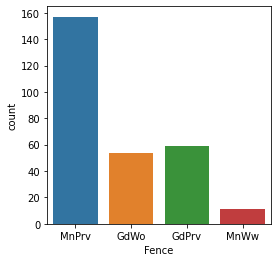

###################################################################################################
      MiscFeature  Ratio
NaN          1406 96.301
Shed           49  3.356
Gar2            2  0.137
Othr            2  0.137
TenC            1  0.068
---------------------------------------------------------------------------------------------------


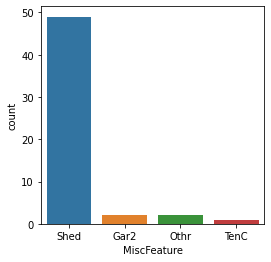

###################################################################################################
       SaleType  Ratio
WD         1267 86.781
New         122  8.356
COD          43  2.945
ConLD         9  0.616
ConLI         5  0.342
ConLw         5  0.342
CWD           4  0.274
Oth           3  0.205
Con           2  0.137
---------------------------------------------------------------------------------------------------


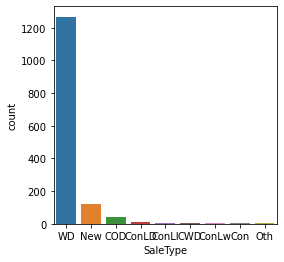

###################################################################################################
         SaleCondition  Ratio
Normal            1198 82.055
Partial            125  8.562
Abnorml            101  6.918
Family              20  1.370
Alloca              12  0.822
AdjLand              4  0.274
---------------------------------------------------------------------------------------------------


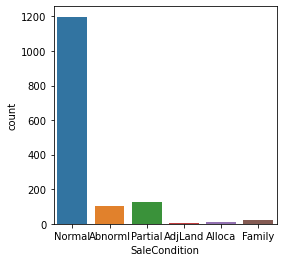

###################################################################################################
     MSSubClass  Ratio
20          536 36.712
60          299 20.479
50          144  9.863
120          87  5.959
30           69  4.726
160          63  4.315
70           60  4.110
80           58  3.973
90           52  3.562
190          30  2.055
---------------------------------------------------------------------------------------------------


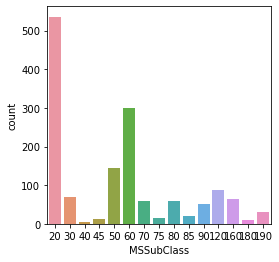

###################################################################################################
    OverallQual  Ratio
5           397 27.192
6           374 25.616
7           319 21.849
8           168 11.507
4           116  7.945
9            43  2.945
3            20  1.370
10           18  1.233
2             3  0.205
1             2  0.137
---------------------------------------------------------------------------------------------------


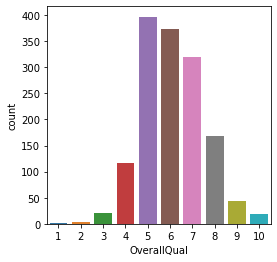

###################################################################################################
   OverallCond  Ratio
5          821 56.233
6          252 17.260
7          205 14.041
8           72  4.932
4           57  3.904
3           25  1.712
9           22  1.507
2            5  0.342
1            1  0.068
---------------------------------------------------------------------------------------------------


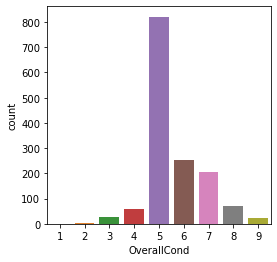

###################################################################################################
      YearRemodAdd  Ratio
1950           178 12.192
2006            97  6.644
2007            76  5.205
2005            73  5.000
2004            62  4.247
2000            55  3.767
2003            51  3.493
2002            48  3.288
2008            40  2.740
1996            36  2.466
---------------------------------------------------------------------------------------------------


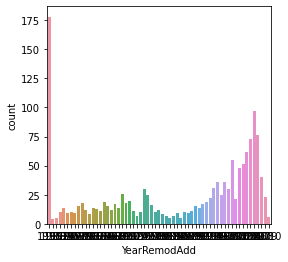

###################################################################################################
     LowQualFinSF  Ratio
0            1434 98.219
80              3  0.205
360             2  0.137
205             1  0.068
479             1  0.068
397             1  0.068
514             1  0.068
120             1  0.068
481             1  0.068
232             1  0.068
---------------------------------------------------------------------------------------------------


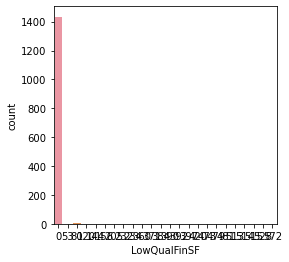

###################################################################################################
   BsmtFullBath  Ratio
0           856 58.630
1           588 40.274
2            15  1.027
3             1  0.068
---------------------------------------------------------------------------------------------------


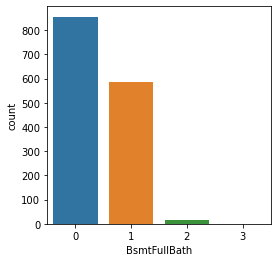

###################################################################################################
   BsmtHalfBath  Ratio
0          1378 94.384
1            80  5.479
2             2  0.137
---------------------------------------------------------------------------------------------------


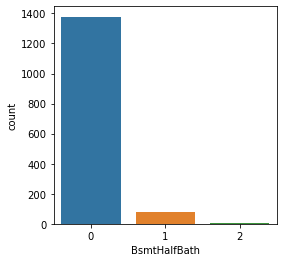

###################################################################################################
   FullBath  Ratio
2       768 52.603
1       650 44.521
3        33  2.260
0         9  0.616
---------------------------------------------------------------------------------------------------


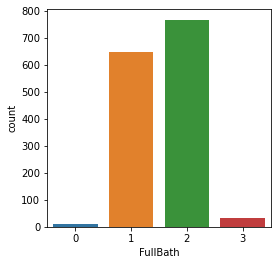

###################################################################################################
   HalfBath  Ratio
0       913 62.534
1       535 36.644
2        12  0.822
---------------------------------------------------------------------------------------------------


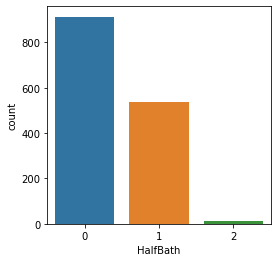

###################################################################################################
   BedroomAbvGr  Ratio
3           804 55.068
2           358 24.521
4           213 14.589
1            50  3.425
5            21  1.438
6             7  0.479
0             6  0.411
8             1  0.068
---------------------------------------------------------------------------------------------------


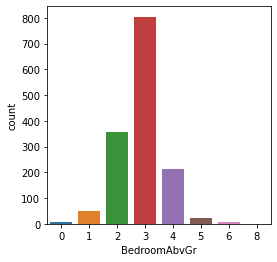

###################################################################################################
   KitchenAbvGr  Ratio
1          1392 95.342
2            65  4.452
3             2  0.137
0             1  0.068
---------------------------------------------------------------------------------------------------


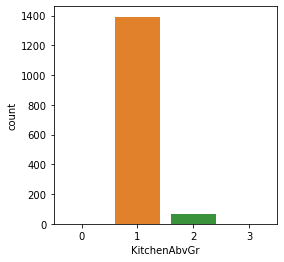

###################################################################################################
    TotRmsAbvGrd  Ratio
6            402 27.534
7            329 22.534
5            275 18.836
8            187 12.808
4             97  6.644
9             75  5.137
10            47  3.219
11            18  1.233
3             17  1.164
12            11  0.753
---------------------------------------------------------------------------------------------------


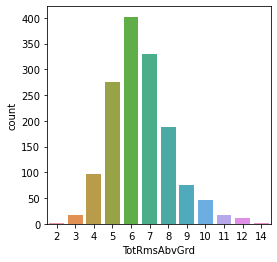

###################################################################################################
   Fireplaces  Ratio
0         690 47.260
1         650 44.521
2         115  7.877
3           5  0.342
---------------------------------------------------------------------------------------------------


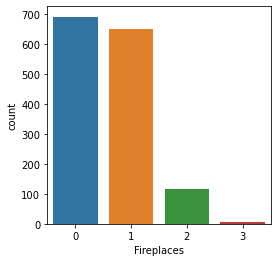

###################################################################################################
   GarageCars  Ratio
2         824 56.438
1         369 25.274
3         181 12.397
0          81  5.548
4           5  0.342
---------------------------------------------------------------------------------------------------


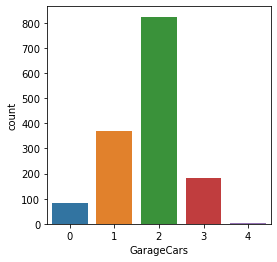

###################################################################################################
     3SsnPorch  Ratio
0         1436 98.356
168          3  0.205
144          2  0.137
180          2  0.137
216          2  0.137
290          1  0.068
153          1  0.068
96           1  0.068
23           1  0.068
162          1  0.068
---------------------------------------------------------------------------------------------------


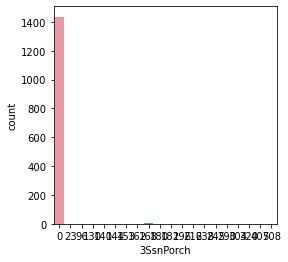

###################################################################################################
     PoolArea  Ratio
0        1453 99.521
512         1  0.068
648         1  0.068
576         1  0.068
555         1  0.068
480         1  0.068
519         1  0.068
738         1  0.068
---------------------------------------------------------------------------------------------------


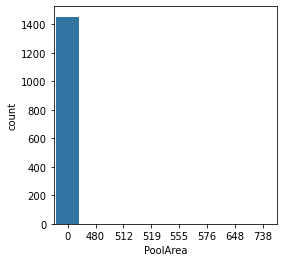

###################################################################################################
       MiscVal  Ratio
0         1408 96.438
400         11  0.753
500          8  0.548
700          5  0.342
450          4  0.274
600          4  0.274
2000         4  0.274
1200         2  0.137
480          2  0.137
15500        1  0.068
---------------------------------------------------------------------------------------------------


###################################################################################################
    MoSold  Ratio
6      253 17.329
7      234 16.027
5      204 13.973
4      141  9.658
8      122  8.356
3      106  7.260
10      89  6.096
11      79  5.411
9       63  4.315
12      59  4.041
---------------------------------------------------------------------------------------------------


###################################################################################################
      YrSold  Ratio
2009     338 23.151
2007     329 22.534
2006     314 21.507
2008     304 20.822
2010     175 11.986
---------------------------------------------------------------------------------------------------


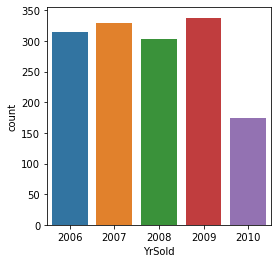

###################################################################################################


In [32]:
cat_summary(df,cat_cols,plot=True,fig_size=4,print_first_x_rows=10)

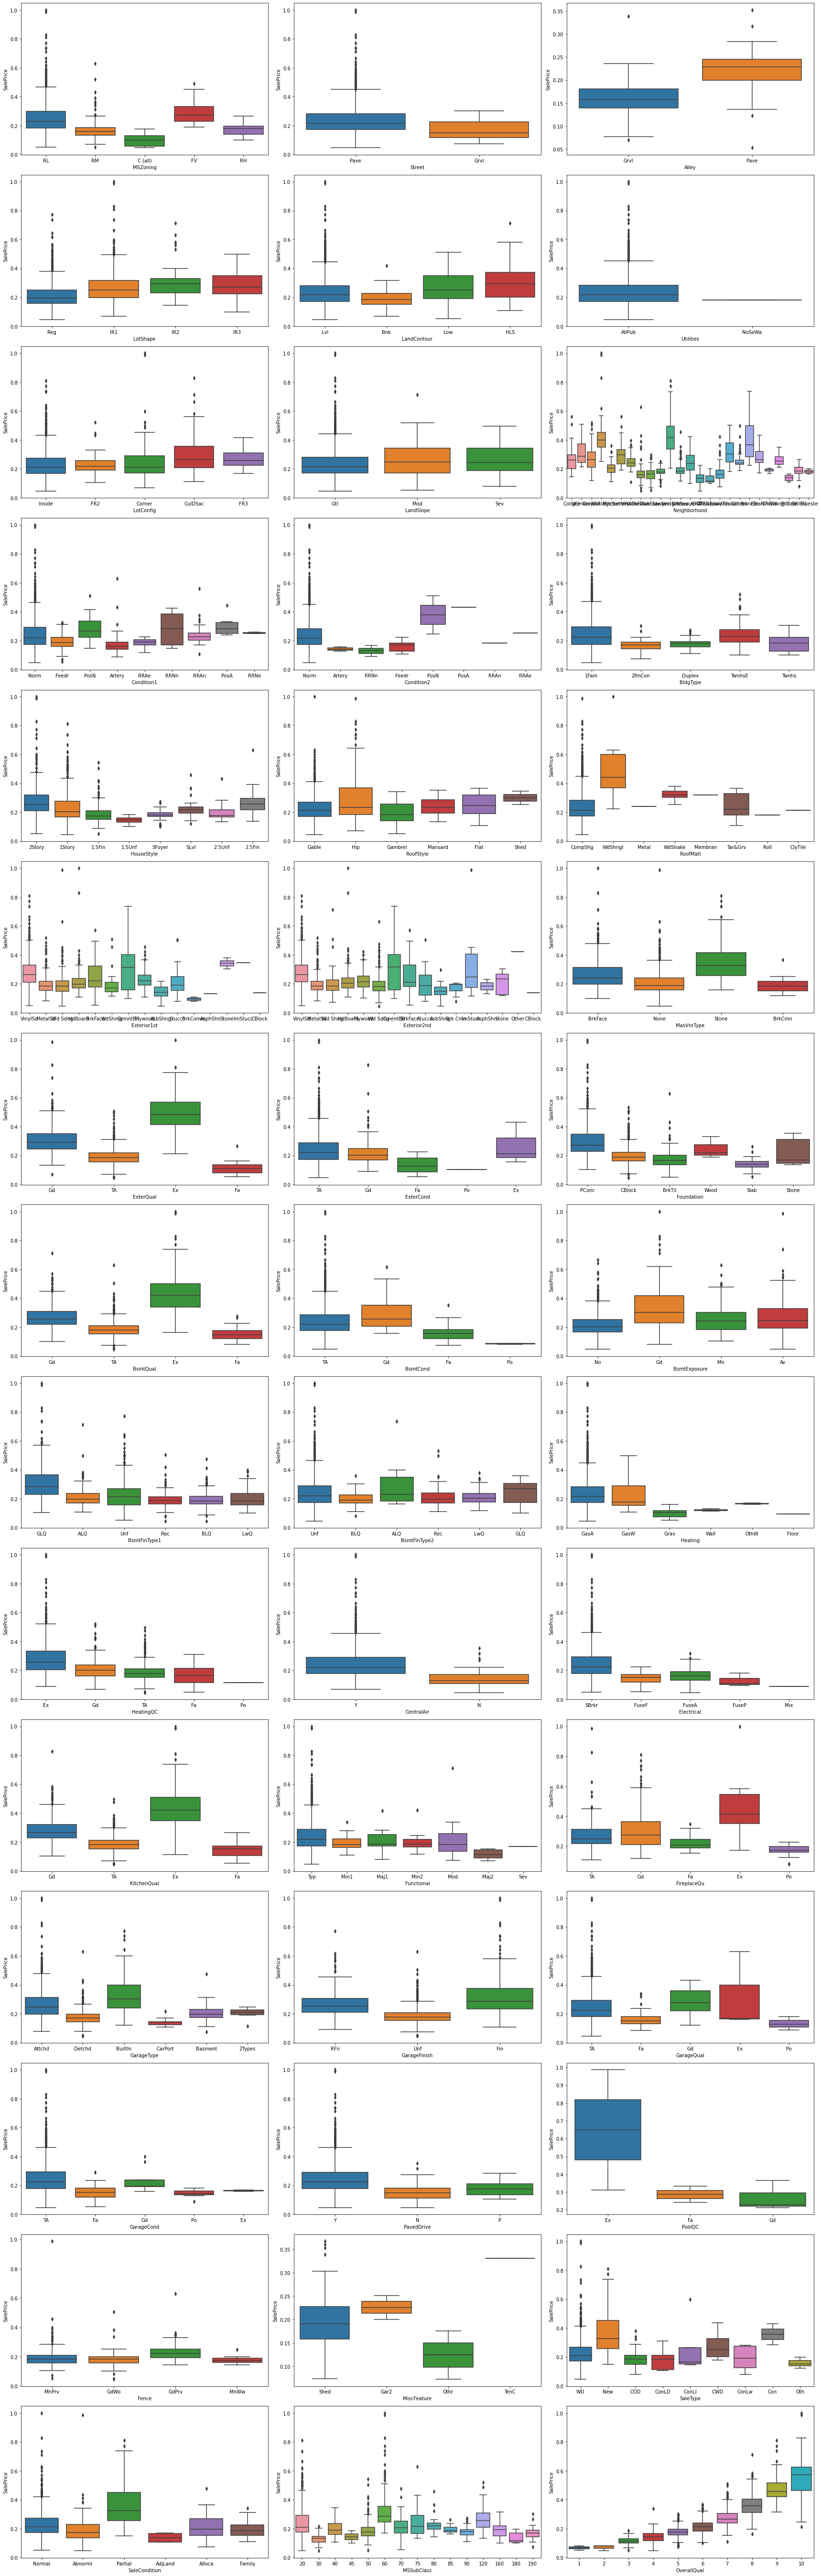

In [33]:
cat_cols = list(cat_cols)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_cols):
            sns.boxplot(x=cat_cols[i], y=target, data=df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()  

       LotFrontage
count     1201.000
mean        70.050
std         24.285
min         21.000
5%          34.000
25%         59.000
50%         69.000
75%         80.000
95%        107.000
max        313.000


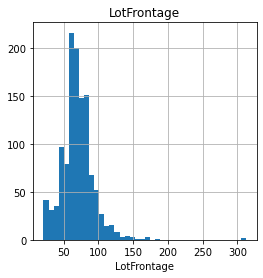

         LotArea
count   1460.000
mean   10516.828
std     9981.265
min     1300.000
5%      3311.700
25%     7553.500
50%     9478.500
75%    11601.500
95%    17401.150
max   215245.000


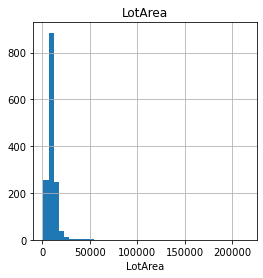

       YearBuilt
count   1460.000
mean    1971.268
std       30.203
min     1872.000
5%      1916.000
25%     1954.000
50%     1973.000
75%     2000.000
95%     2007.000
max     2010.000


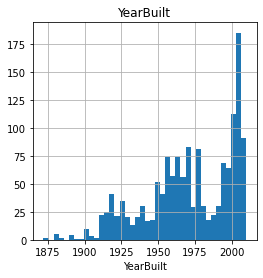

       MasVnrArea
count    1452.000
mean      103.685
std       181.066
min         0.000
5%          0.000
25%         0.000
50%         0.000
75%       166.000
95%       456.000
max      1600.000


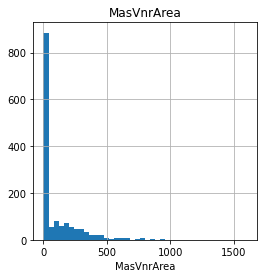

       BsmtFinSF1
count    1460.000
mean      443.640
std       456.098
min         0.000
5%          0.000
25%         0.000
50%       383.500
75%       712.250
95%      1274.000
max      5644.000


In [34]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.25 , 0.75, 0.95]
    print(pd.DataFrame(dataframe[numerical_col].describe(quantiles)))

    if plot:
        dataframe[numerical_col].hist(bins=40)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
for col in num_cols[:5]:
    num_summary(df, col, plot=True)

In [35]:
# Göreselleştirme yaparken aynı anda iki adet target kolonu çıkıp hata vermesin diye burada yeni bir liste oluşturup targetı sildik
num_cols2=num_cols[:]
num_cols2.remove(target)

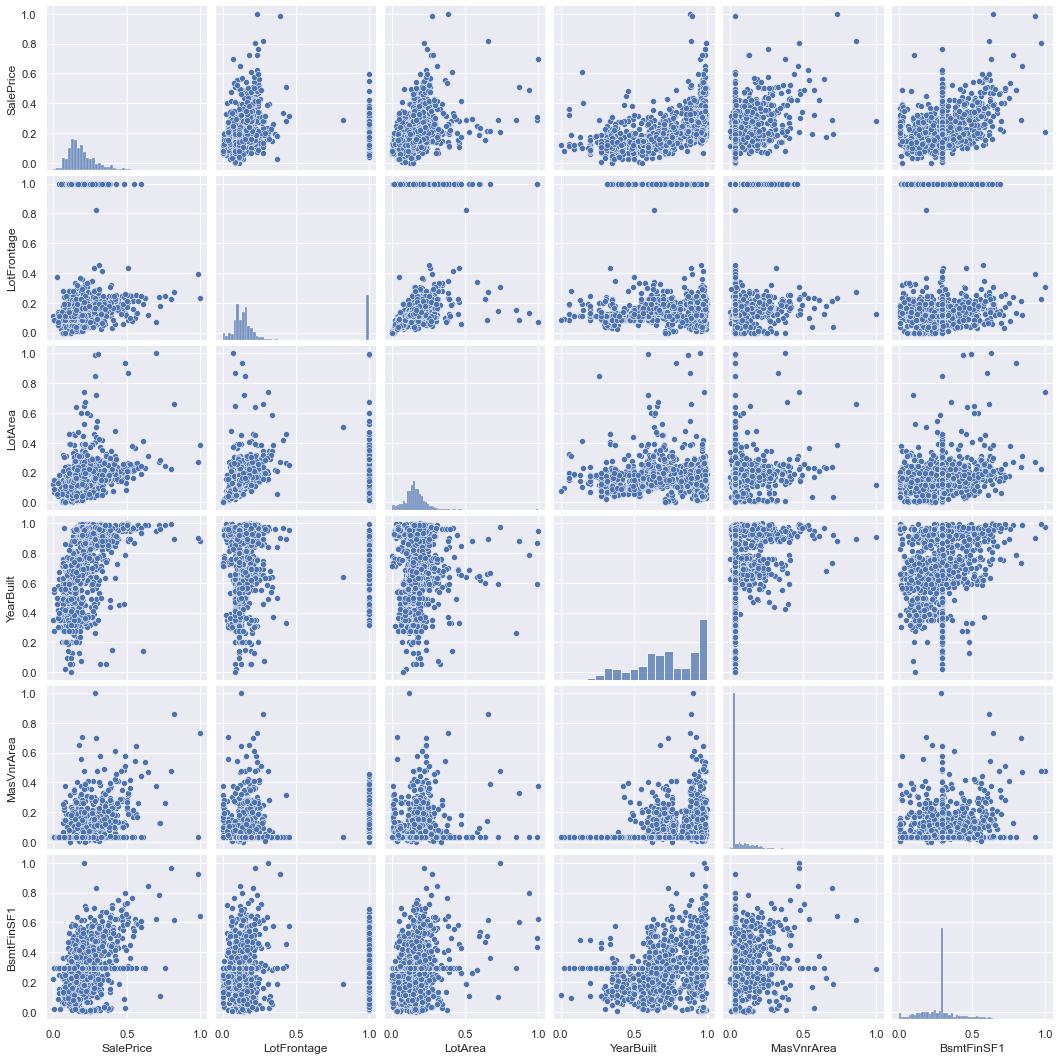

In [108]:
sns.pairplot(df[[target]+num_cols2[:len(num_cols2)//3]])
plt.show()

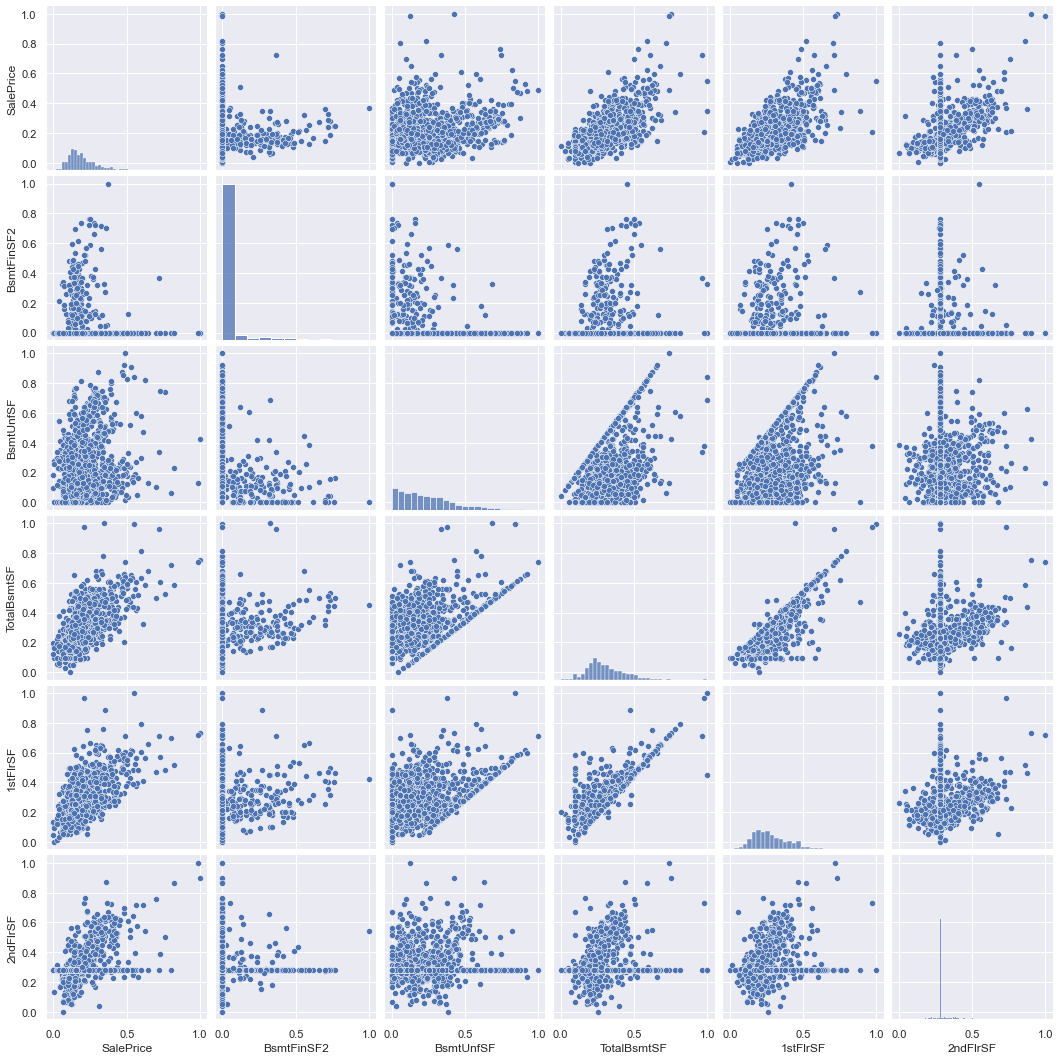

In [109]:
sns.pairplot(df[[target]+num_cols2[(len(num_cols2)//3):2*(len(num_cols2)//3)]])
plt.show()

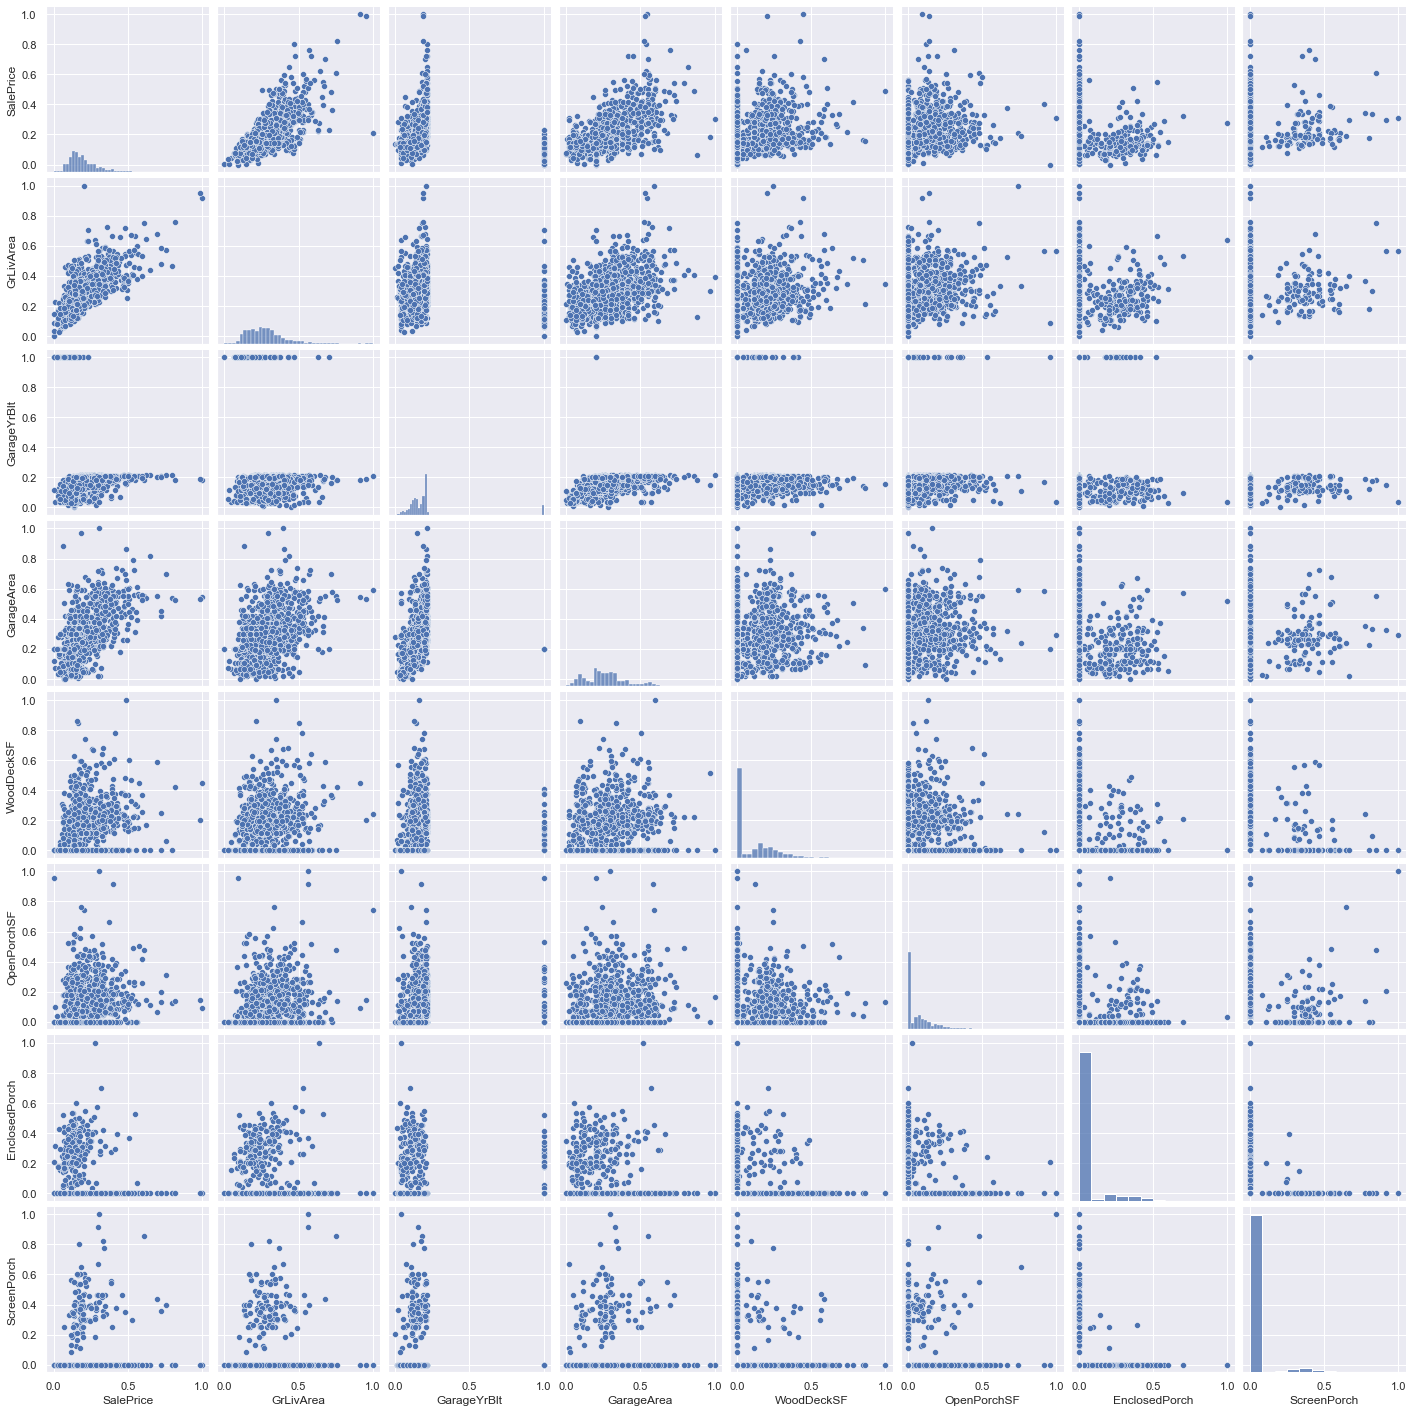

In [110]:
sns.pairplot(df[[target]+num_cols2[2*(len(num_cols2)//3):]])
plt.show()

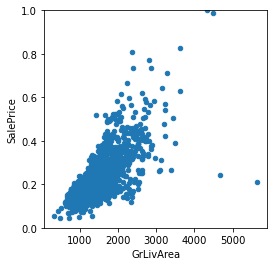

In [39]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,df['SalePrice'].max()));

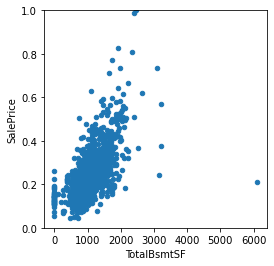

In [40]:
#scatter plot TotalBsmtSF/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,df['SalePrice'].max()));

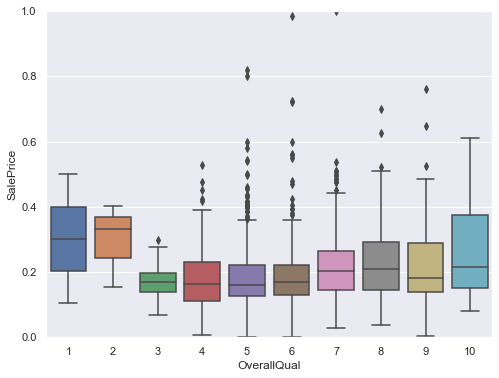

In [111]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df_copy[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=df['SalePrice'].max());

In [42]:
df_corr=df.corr()

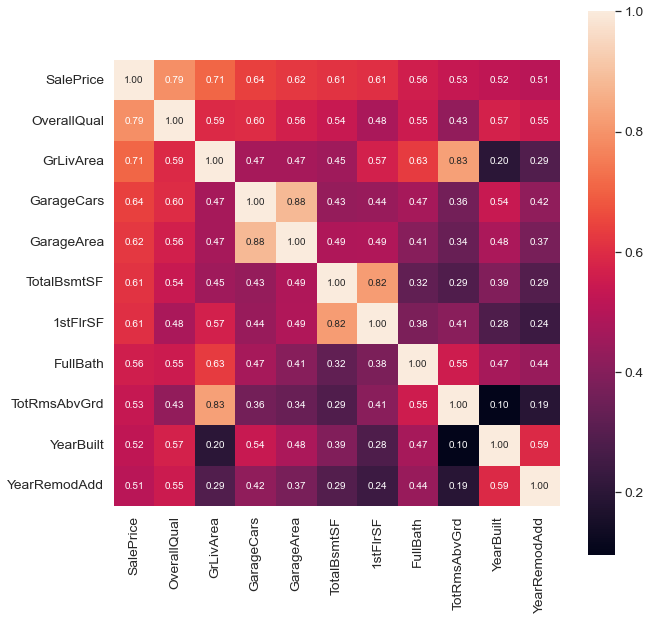

In [43]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = df_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(10,10))    
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
df_modes_all=col_df_modes_all_fonk(df,col=cat_cols,target=target)
df_modes_all

col    modes  target_mean  target_mean_diff  modes_rate  modes_count  dtypes  col_isna_rate  col_notna_rate  nunique                                            uniques
0       MSSubClass       20        0.245             0.007       0.367          536   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
1       MSSubClass       60        0.318             0.103       0.205          299   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
2       MSSubClass       50        0.190             0.208       0.099          144   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
3       MSSubClass      120        0.266             0.035       0.060           87   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
4       MSSubClass       30        0.127             0.470       0.047           69   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
..             ...      ...          ...               ...         ...          ...     ...            ...             ...      ...                                                ...
479  SaleCondition  Partial        0.361             0.159       0.086          125  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
480  SaleCondition  Abnorml        0.194             0.190       0.069          101  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
481  SaleCondition   Family        0.198             0.173       0.014           20  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
482  SaleCondition   Alloca        0.222             0.075       0.008           12  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
483  SaleCondition  AdjLand        0.138             0.424       0.003            4  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...

[484 rows x 11 columns]

In [45]:
df_modes_all[df_modes_all["modes_count"]>10].sort_values("target_mean",ascending=False).head(10)

col    modes  target_mean  target_mean_diff  modes_rate  modes_count  dtypes  col_isna_rate  col_notna_rate  nunique                                            uniques
104   OverallQual       10        0.581             0.449       0.012           18   int64          0.000           1.000       10                    [ 7  6  8  5  9  4 10  3  1  2]
102   OverallQual        9        0.487             0.325       0.029           43   int64          0.000           1.000       10                    [ 7  6  8  5  9  4 10  3  1  2]
228     ExterQual       Ex        0.487             0.325       0.036           52  object          0.000           1.000        4                              ['Gd' 'TA' 'Ex' 'Fa']
316      FullBath        3        0.461             0.291       0.023           33   int64          0.000           1.000        4                                          [2 1 3 0]
363   FireplaceQu       Ex        0.447             0.273       0.016           24  object          0.473           0.527        5                     [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
55   Neighborhood  NoRidge        0.444             0.269       0.028           41  object          0.000           1.000       25  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitc...
335   KitchenQual       Ex        0.435             0.257       0.068          100  object          0.000           1.000        4                              ['Gd' 'TA' 'Ex' 'Fa']
243      BsmtQual       Ex        0.433             0.255       0.083          121  object          0.025           0.975        4                          ['Gd' 'TA' 'Ex' nan 'Fa']
344  TotRmsAbvGrd       11        0.421             0.239       0.012           18   int64          0.000           1.000       12              [ 8  6  7  9  5 11  4 10 12  3  2 14]
48   Neighborhood  NridgHt        0.419             0.236       0.053           77  object          0.000           1.000       25  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitc...

In [46]:
df_modes_all[df_modes_all["modes_count"]>10].sort_values("target_mean",ascending=True).head(10)

col    modes  target_mean  target_mean_diff  modes_rate  modes_count  dtypes  col_isna_rate  col_notna_rate  nunique                                            uniques
103   OverallQual        3        0.116             0.517       0.014           20   int64          0.000           1.000       10                    [ 7  6  8  5  9  4 10  3  1  2]
229     ExterQual       Fa        0.117             0.514       0.010           14  object          0.000           1.000        4                              ['Gd' 'TA' 'Ex' 'Fa']
4      MSSubClass       30        0.127             0.470       0.047           69   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
61   Neighborhood  MeadowV        0.131             0.455       0.012           17  object          0.000           1.000       25  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitc...
57   Neighborhood   IDOTRR        0.133             0.447       0.025           37  object          0.000           1.000       25  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitc...
112   OverallCond        3        0.135             0.437       0.017           25   int64          0.000           1.000        9                                [5 8 6 7 4 2 3 9 1]
232     ExterCond       Fa        0.136             0.433       0.019           28  object          0.000           1.000        5                         ['TA' 'Gd' 'Fa' 'Po' 'Ex']
377    GarageCars        0        0.137             0.429       0.055           81   int64          0.000           1.000        5                                        [2 3 1 0 4]
63   Neighborhood   BrDale        0.138             0.422       0.011           16  object          0.000           1.000       25  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitc...
277    CentralAir        N        0.139             0.418       0.065           95  object          0.000           1.000        2                                          ['Y' 'N']

In [47]:
def find_mean_to_target_mean_diff(df,df_modes_all,col,target):
    df_modes_less_than_target_mean=df_modes_all[df_modes_all[col]<df[target].mean()]
    df_modes_greater_than_target_mean=df_modes_all[df_modes_all[col]>df[target].mean()]
    target_mean=df[target].mean()
    
    df_modes_all[col+"_diff"]=0
    df_modes_all.loc[df_modes_less_than_target_mean.index,(col+"_diff")]=(1-(df_modes_less_than_target_mean[col].values/target_mean))
    df_modes_all.loc[df_modes_greater_than_target_mean.index,(col+"_diff")]=(((df_modes_greater_than_target_mean[col].values)-target_mean)/(1-target_mean))
    return df_modes_all
col="target_mean"
find_mean_to_target_mean_diff(df,df_modes_all,"target_mean",target)

col    modes  target_mean  target_mean_diff  modes_rate  modes_count  dtypes  col_isna_rate  col_notna_rate  nunique                                            uniques
0       MSSubClass       20        0.245             0.007       0.367          536   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
1       MSSubClass       60        0.318             0.103       0.205          299   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
2       MSSubClass       50        0.190             0.208       0.099          144   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
3       MSSubClass      120        0.266             0.035       0.060           87   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
4       MSSubClass       30        0.127             0.470       0.047           69   int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
..             ...      ...          ...               ...         ...          ...     ...            ...             ...      ...                                                ...
479  SaleCondition  Partial        0.361             0.159       0.086          125  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
480  SaleCondition  Abnorml        0.194             0.190       0.069          101  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
481  SaleCondition   Family        0.198             0.173       0.014           20  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
482  SaleCondition   Alloca        0.222             0.075       0.008           12  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
483  SaleCondition  AdjLand        0.138             0.424       0.003            4  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...

[484 rows x 11 columns]

# Feature Engineering 
> Find Features With Strong Correlation to Target

In [48]:
df['BsmtFinType1_Unf'] = 1*(df['BsmtFinType1'] == 'Unf')
df['HasWoodDeck'] = (df['WoodDeckSF'] == 0) * 1
df['HasOpenPorch'] = (df['OpenPorchSF'] == 0) * 1
df['HasEnclosedPorch'] = (df['EnclosedPorch'] == 0) * 1
df['Has3SsnPorch'] = (df['3SsnPorch'] == 0) * 1
df['HasScreenPorch'] = (df['ScreenPorch'] == 0) * 1
df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)
df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']
df = df.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']   
df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +
                                 df['1stFlrSF'] + df['2ndFlrSF'])
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                               df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                              df['EnclosedPorch'] + df['ScreenPorch'] +
                              df['WoodDeckSF'])
df['TotalBsmtSF'] = df['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df['2ndFlrSF'] = df['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
df['GarageArea'] = df['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df['GarageCars'] = df['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
df['LotFrontage'] = df['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
df['MasVnrArea'] = df['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
df['BsmtFinSF1'] = df['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [49]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

df = logs(df, log_features)

In [50]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log']
df = squares(df, squared_features)

In [51]:
#["OverallQual","AllSF","AllFlrsSF","GrLivArea","SimplOverallQual","ExterQual","GarageCars","TotalBath","KitchenQual","GarageScore",""]

In [52]:
cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df)

              cat_cols            num_cols cat_but_car         num_but_cat cat_cols_object
0                   89                  44           0                  49              40
1                - - -               - - -       - - -               - - -           - - -
2             MSZoning         LotFrontage       - - -          MSSubClass        MSZoning
3                Alley             LotArea       - - -         OverallQual           Alley
4             LotShape           YearBuilt       - - -         OverallCond        LotShape
5          LandContour          MasVnrArea       - - -        YearRemodAdd     LandContour
6            LotConfig          BsmtFinSF1       - - -        LowQualFinSF       LotConfig
7            LandSlope          BsmtFinSF2       - - -        BsmtFullBath       LandSlope
8         Neighborhood           BsmtUnfSF       - - -        BsmtHalfBath    Neighborhood
9           Condition1         TotalBsmtSF       - - -            FullBath      Condition1

# Missing Observation Analysis

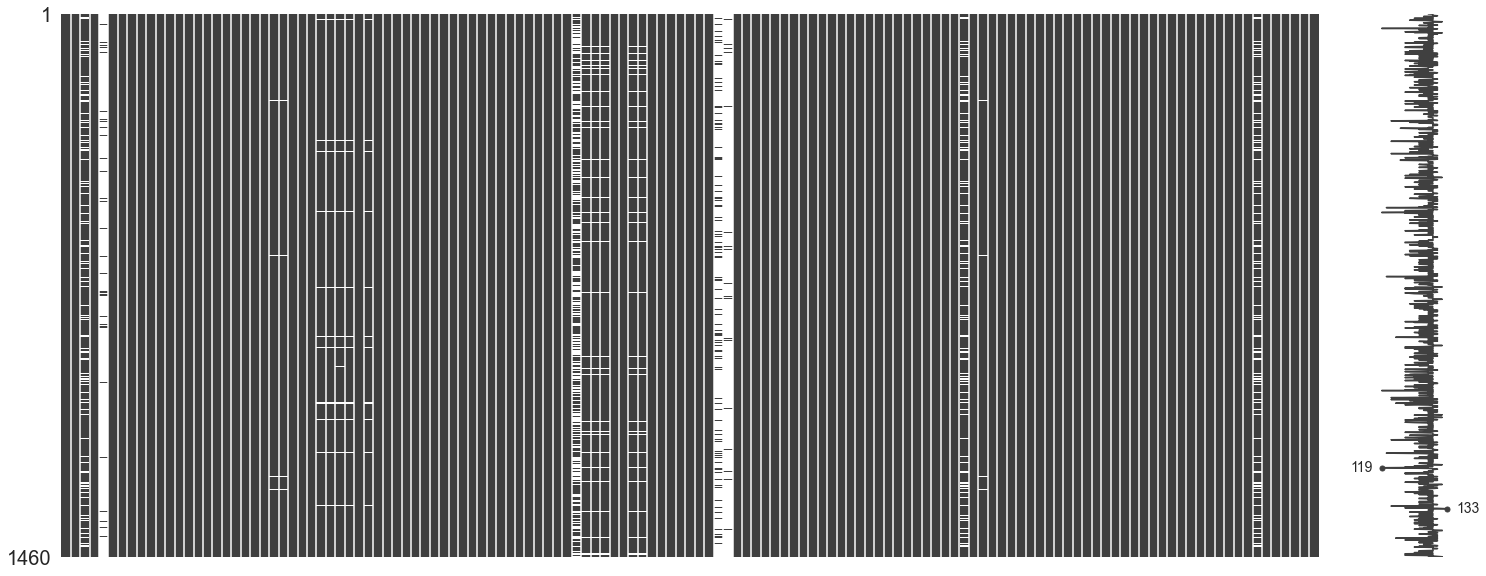

In [53]:
# Görüldüğü üzere aynı eksik değerler diğer değişkenlerde de eksik. bu eksiklikler anlamlı olabilir. 
msno.matrix(df)
plt.show()

<AxesSubplot:>

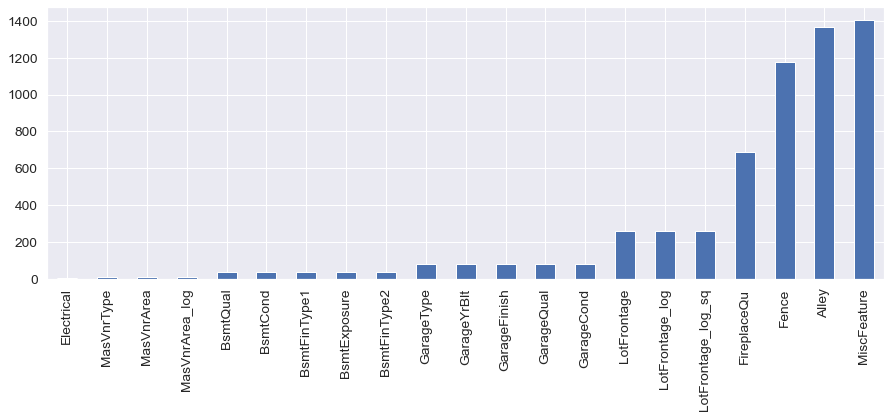

In [54]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(15,5))

In [55]:
def df_nan_func(dataframe, target):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    isna_count = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    isna_ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    df_nan = pd.concat([isna_count, np.round(isna_ratio, 1)], axis=1, keys=['isna_count', 'isna_ratio'])
    df_nan["notna_count"]=len(df)-df_nan["isna_count"]
    df_nan["notna__ratio"]=100-df_nan["isna_ratio"]
    
    df_nan["isna_mean"]=0
    df_nan["notna_mean"]=0
    for col in df_nan.index:
        if col!=target:
            df_nan.loc[col,"isna_mean"]=dataframe.loc[dataframe[col].isna(),target].mean()
            df_nan.loc[col,"notna_mean"]=dataframe.loc[dataframe[col].notna(),target].mean()
    
    df_nan["isna_mean_diff%"]=0
    df_nan.loc[df_nan[df_nan["isna_mean"]<dataframe[target].mean()].index,"isna_mean_diff%"]=1-(df_nan[df_nan["isna_mean"]<dataframe[target].mean()]["isna_mean"].values/dataframe[target].mean())
    df_nan.loc[df_nan[df_nan["isna_mean"]>dataframe[target].mean()].index,"isna_mean_diff%"]=(((df_nan[df_nan["isna_mean"]>dataframe[target].mean()]["isna_mean"].values)-dataframe[target].mean())/(1-dataframe[target].mean()))
    
    df_nan["notna_mean_diff%"]=0
    df_nan.loc[df_nan[df_nan["notna_mean"]<dataframe[target].mean()].index,"notna_mean_diff%"]=1-(df_nan[df_nan["notna_mean"]<dataframe[target].mean()]["notna_mean"].values/dataframe[target].mean())
    df_nan.loc[df_nan[df_nan["notna_mean"]>dataframe[target].mean()].index,"notna_mean_diff%"]=(((df_nan[df_nan["notna_mean"]>dataframe[target].mean()]["notna_mean"].values)-dataframe[target].mean())/(1-dataframe[target].mean()))

    df_nan["na_diff_sum"]=abs(df_nan["isna_mean_diff%"]+df_nan["notna_mean_diff%"])
    
    df_nan["dtypes"]=""
    for index in df_nan.index:
        df_nan.loc[index,"dtypes"]=str(df.dtypes[index])
    return df_nan

In [56]:
# yuakarıda bahsettiğimiz aynı eksik değerlerin birçok kolonda olması durumu burada da açıkça görülmektedir.
df_nan=df_nan_func(df, target)
df_nan

isna_count  isna_ratio  notna_count  notna__ratio  isna_mean  notna_mean  isna_mean_diff%  notna_mean_diff%  na_diff_sum   dtypes
MiscFeature               1406      96.300           54         3.700      0.241       0.201            0.002             0.162        0.164   object
Alley                     1369      93.800           91         6.200      0.243       0.189            0.004             0.210        0.215   object
Fence                     1179      80.800          281        19.200      0.248       0.203            0.012             0.155        0.166   object
FireplaceQu                690      47.300          770        52.700      0.187       0.287            0.219             0.062        0.281   object
LotFrontage_log            259      17.700         1201        82.300      0.241       0.239            0.001             0.001        0.002  float64
LotFrontage                259      17.700         1201        82.300      0.241       0.239            0.001             0.001        0.002  float64
LotFrontage_log_sq         259      17.700         1201        82.300      0.241       0.239            0.001             0.001        0.002  float64
GarageType                  81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
GarageYrBlt                 81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437  float64
GarageFinish                81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
GarageQual                  81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
GarageCond                  81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
BsmtExposure                38       2.600         1422        97.400      0.143       0.242            0.403             0.003        0.407   object
BsmtFinType2                38       2.600         1422        97.400      0.146       0.242            0.390             0.003        0.393   object
BsmtFinType1                37       2.500         1423        97.500      0.140       0.242            0.416             0.003        0.419   object
BsmtCond                    37       2.500         1423        97.500      0.140       0.242            0.416             0.003        0.419   object
BsmtQual                    37       2.500         1423        97.500      0.140       0.242            0.416             0.003        0.419   object
MasVnrArea                   8       0.500         1452        99.500      0.313       0.239            0.097             0.002        0.098  float64
MasVnrType                   8       0.500         1452        99.500      0.313       0.239            0.097             0.002        0.098   object
MasVnrArea_log               8       0.500         1452        99.500      0.313       0.239            0.097             0.002        0.098  float64
Electrical                   1       0.100         1459        99.900      0.222       0.240            0.074             0.000        0.074   object

In [57]:
##############
# çıkarım  1.  Az sayıdaki nan değerlerin ortalaması genel ortalamadan daha farklı daha olasıdır. 
############## bu  nedenle çok az sayıdaki nan değerlerin target mean değerlerinde aşırı fark yoksa kendi median değerlerini atayabiliriz.

def find_cols_for_fill_to_median(df_nan):
    # buradaki sayısal değerler kendi tecrübelerime dayanmaktadır. tecrübelerinize göre değişiklik yapabilirsiniz 
    dfx1=df_nan[((df_nan["isna_count"]<10)|((df_nan["notna_count"]<10))) & (df_nan["na_diff_sum"]<0.8)]
    dfx2=df_nan[((df_nan["isna_count"]<25)|((df_nan["notna_count"]<25))) & (df_nan["na_diff_sum"]<0.40)]
    dfx3=df_nan[((df_nan["isna_count"]<50)|((df_nan["notna_count"]<50))) & (df_nan["na_diff_sum"]<0.20)]
    dfx4=df_nan[((df_nan["isna_count"]<100)|((df_nan["notna_count"]<100))) & (df_nan["na_diff_sum"]<0.15)]
    dfx5=df_nan[df_nan["na_diff_sum"]<0.1]
    dfx_all=pd.concat([dfx1,dfx2,dfx3,dfx4,dfx5],axis=0)
    df_nan_fill_median_or_mode=dfx_all.drop_duplicates()
    
    df_nan_dont_fill_median_or_mode=df_nan.loc[~df_nan.index.isin(df_nan_fill_median_or_mode.index)]

    return df_nan_fill_median_or_mode,df_nan_dont_fill_median_or_mode
df_nan_fill_median_or_mode,df_nan_dont_fill_median_or_mode=dfx_all=find_cols_for_fill_to_median(df_nan)
df_nan_fill_median_or_mode

isna_count  isna_ratio  notna_count  notna__ratio  isna_mean  notna_mean  isna_mean_diff%  notna_mean_diff%  na_diff_sum   dtypes
MasVnrArea                8       0.500         1452        99.500      0.313       0.239            0.097             0.002        0.098  float64
MasVnrType                8       0.500         1452        99.500      0.313       0.239            0.097             0.002        0.098   object
Electrical                1       0.100         1459        99.900      0.222       0.240            0.074             0.000        0.074   object
LotFrontage_log         259      17.700         1201        82.300      0.241       0.239            0.001             0.001        0.002  float64

In [58]:
# değerler incelendiğinde object olanlara yeni bir mode olan "nan_value" ataması yapacağız. 
# sadece float olan nan değerler için GarageYrBlt_isna adında yeni bir değişken tanımlayacağız.
df_nan_dont_fill_median_or_mode

isna_count  isna_ratio  notna_count  notna__ratio  isna_mean  notna_mean  isna_mean_diff%  notna_mean_diff%  na_diff_sum   dtypes
MiscFeature               1406      96.300           54         3.700      0.241       0.201            0.002             0.162        0.164   object
Alley                     1369      93.800           91         6.200      0.243       0.189            0.004             0.210        0.215   object
Fence                     1179      80.800          281        19.200      0.248       0.203            0.012             0.155        0.166   object
FireplaceQu                690      47.300          770        52.700      0.187       0.287            0.219             0.062        0.281   object
LotFrontage                259      17.700         1201        82.300      0.241       0.239            0.001             0.001        0.002  float64
LotFrontage_log_sq         259      17.700         1201        82.300      0.241       0.239            0.001             0.001        0.002  float64
GarageType                  81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
GarageYrBlt                 81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437  float64
GarageFinish                81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
GarageQual                  81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
GarageCond                  81       5.500         1379        94.500      0.137       0.246            0.429             0.008        0.437   object
BsmtExposure                38       2.600         1422        97.400      0.143       0.242            0.403             0.003        0.407   object
BsmtFinType2                38       2.600         1422        97.400      0.146       0.242            0.390             0.003        0.393   object
BsmtFinType1                37       2.500         1423        97.500      0.140       0.242            0.416             0.003        0.419   object
BsmtCond                    37       2.500         1423        97.500      0.140       0.242            0.416             0.003        0.419   object
BsmtQual                    37       2.500         1423        97.500      0.140       0.242            0.416             0.003        0.419   object
MasVnrArea_log               8       0.500         1452        99.500      0.313       0.239            0.097             0.002        0.098  float64

In [59]:
# eğer categorik değişkende not nan sayısı çok az ve bu değerler anlamlı değil ise bu kolonu drop edebiliriz. 
# istendiği takdirde drop etmeden modele konup feature importance değerine bakılıp öyle karar da verilebilir.Biz şimdilik bu kolonları silmiyoruz.

def fill_nan_values(df,df_nan_fill_median_or_mode,df_nan_dont_fill_median_or_mode,cat_cols_object):
    
    for col in df_nan_fill_median_or_mode.index:
        # categorik olan nan değerleri yerine mode değerleri atıyoruz
        if col in cat_cols_object:
            
            df.loc[df[df[col].isna()].index,col]=df[col].mode()[0]
         
        
        # num but cat olan nan değerleri yerine mode değerleri atıyoruz
        # burada daha ayrıntılı çalışma yapılıp mode'ların meanlarına bakılarak daha iyi bir atama yapılabilir.
        elif df[col].nunique()<20:
            df.loc[df[df[col].isna()].index,col]=df[col].mode()[0]
            
        # numeric olan nan değerleri yerine median değerleri atıyoruz
        else:
            df.loc[df[df[col].isna()].index,col]=df[col].median()
     

    ##############################################################################################################################################
    for col in df_nan_dont_fill_median_or_mode.index:
        # categorik olan nan değerleri yerine yeni bir mode değerleri atıyoruz. 
        if col in cat_cols_object:
            df.loc[df[df[col].isna()].index,col]="nan_value"


        else:
            # burada anlamlı isna olan sayısal değişkenler için yeni bir değişken tanımlıyoruz. bunlara 1 değerini atıyoruz
            # isna olan kolon içerisinde de nan değeri yerine etkisiz eleman olan 0 değerini atıyoruz. Bu konuda daha ayrıntılı çalışma yapılabilir.
            df[col+"_isna"]=0
            df.loc[df[df[col].isna()].index,col+"_isna"]=1
            df.loc[df[df[col].isna()].index,col]=(1.2*df[col].max())
    
    return df
df=fill_nan_values(df,df_nan_fill_median_or_mode,df_nan_dont_fill_median_or_mode,cat_cols_object)
df.isna().sum()

MSSubClass                 0
MSZoning                   0
LotFrontage                0
LotArea                    0
Alley                      0
                          ..
GarageArea_log_sq          0
LotFrontage_isna           0
LotFrontage_log_sq_isna    0
GarageYrBlt_isna           0
MasVnrArea_log_isna        0
Length: 137, dtype: int64

In [60]:
df_modes_all=col_df_modes_all_fonk(df,col=cat_cols,target=target)
df_modes_all

col modes  target_mean  target_mean_diff  modes_rate  modes_count dtypes  col_isna_rate  col_notna_rate  nunique                                            uniques
0                 MSSubClass    20        0.245             0.007       0.367          536  int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
1                 MSSubClass    60        0.318             0.103       0.205          299  int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
2                 MSSubClass    50        0.190             0.208       0.099          144  int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
3                 MSSubClass   120        0.266             0.035       0.060           87  int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
4                 MSSubClass    30        0.127             0.470       0.047           69  int64          0.000           1.000       15  [ 60  20  70  50 190  45  90 120  30  85  80 1...
..                       ...   ...          ...               ...         ...          ...    ...            ...             ...      ...                                                ...
847  LotFrontage_log_sq_isna     1        0.241             0.001       0.177          259  int64          0.000           1.000        2                                              [0 1]
848         GarageYrBlt_isna     0        0.246             0.008       0.945         1379  int64          0.000           1.000        2                                              [0 1]
849         GarageYrBlt_isna     1        0.137             0.429       0.055           81  int64          0.000           1.000        2                                              [0 1]
850      MasVnrArea_log_isna     0        0.239             0.002       0.995         1452  int64          0.000           1.000        2                                              [0 1]
851      MasVnrArea_log_isna     1        0.313             0.097       0.005            8  int64          0.000           1.000        2                                              [0 1]

[852 rows x 11 columns]

In [61]:
# mode count değerleri çok az olanların target meanları hakkında anlamlı olup olmadıklarına karar vermek çok zordur.
# istaisliki olarak anlamlılık testi için sayıları yeterli değildir.
# ayrıca dummy değişken tuzağından kurtulmak için zaten bazı mode'ları silmemiz gerektiği de açıktır.
# Oransal olarak çok az oldukları için bu mode'ları silmek yine de dummy değişken tuzağından kurtulmak için yeterli olmayacaktır.

del_little_modes=df_modes_all[df_modes_all["modes_count"]<5][df_modes_all["dtypes"]=="object"].sort_values("target_mean",ascending=True)
del_little_modes

col    modes  target_mean  target_mean_diff  modes_rate  modes_count  dtypes  col_isna_rate  col_notna_rate  nunique                                            uniques
247       BsmtCond       Po        0.085             0.646       0.001            2  object          0.000           1.000        5                  ['TA' 'Gd' 'nan_value' 'Fa' 'Po']
284     Electrical      Mix        0.089             0.630       0.001            1  object          0.000           1.000        5            ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
198    Exterior1st  BrkComm        0.094             0.608       0.001            2  object          0.000           1.000       15  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF...
272        Heating    Floor        0.096             0.599       0.001            1  object          0.000           1.000        6       ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
231      ExterCond       Po        0.101             0.577       0.001            1  object          0.000           1.000        5                         ['TA' 'Gd' 'Fa' 'Po' 'Ex']
277      HeatingQC       Po        0.115             0.519       0.001            1  object          0.000           1.000        5                         ['Ex' 'Gd' 'TA' 'Fa' 'Po']
270        Heating     Wall        0.122             0.491       0.003            4  object          0.000           1.000        6       ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
435    MiscFeature     Othr        0.125             0.480       0.001            2  object          0.000           1.000        5          ['nan_value' 'Shed' 'Gar2' 'Othr' 'TenC']
76      Condition2     RRNn        0.128             0.465       0.001            2  object          0.000           1.000        8  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' ...
283     Electrical    FuseP        0.129             0.462       0.002            3  object          0.000           1.000        5            ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
200    Exterior1st  AsphShn        0.132             0.447       0.001            1  object          0.000           1.000       15  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF...
389     GarageQual       Po        0.133             0.446       0.002            3  object          0.000           1.000        6             ['TA' 'Fa' 'Gd' 'nan_value' 'Ex' 'Po']
489  SaleCondition  AdjLand        0.138             0.424       0.003            4  object          0.000           1.000        6  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...
202    Exterior1st   CBlock        0.139             0.420       0.001            1  object          0.000           1.000       15  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF...
218    Exterior2nd   CBlock        0.139             0.420       0.001            1  object          0.000           1.000       16  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plyw...
75      Condition2   Artery        0.141             0.411       0.001            2  object          0.000           1.000        8  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' ...
482       SaleType      Oth        0.159             0.338       0.002            3  object          0.000           1.000        9  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw...
395     GarageCond       Ex        0.164             0.315       0.001            2  object          0.000           1.000        6             ['TA' 'Fa' 'nan_value' 'Gd' 'Po' 'Ex']
271        Heating     OthW        0.167             0.305       0.001            2  object          0.000           1.000        6       ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
357     Functional      Sev        0.171             0.287       0.001            1  object          0.000           1.000        7    ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
79      Condition2     RRAn        0.181             0.243       0.001            1  object          0.000           1.000        8  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 

In [62]:
del_little_modes_dummys=[(col+"_"+mode) for col,mode in del_little_modes[["col","modes"]].values]
del_little_modes_dummys

['BsmtCond_Po',
 'Electrical_Mix',
 'Exterior1st_BrkComm',
 'Heating_Floor',
 'ExterCond_Po',
 'HeatingQC_Po',
 'Heating_Wall',
 'MiscFeature_Othr',
 'Condition2_RRNn',
 'Electrical_FuseP',
 'Exterior1st_AsphShn',
 'GarageQual_Po',
 'SaleCondition_AdjLand',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'Condition2_Artery',
 'SaleType_Oth',
 'GarageCond_Ex',
 'Heating_OthW',
 'Functional_Sev',
 'Condition2_RRAn',
 'RoofMatl_Roll',
 'Neighborhood_Blueste',
 'Exterior2nd_AsphShn',
 'RoofMatl_ClyTile',
 'MiscFeature_Gar2',
 'RoofMatl_Metal',
 'Foundation_Wood',
 'Condition2_RRAe',
 'Condition1_RRNe',
 'ExterCond_Ex',
 'LotConfig_FR3',
 'SaleType_CWD',
 'RoofStyle_Shed',
 'GarageQual_Ex',
 'RoofMatl_Membran',
 'MiscFeature_TenC',
 'Exterior1st_Stone',
 'Exterior1st_ImStucc',
 'SaleType_Con',
 'Condition2_PosN',
 'Exterior2nd_Other',
 'Condition2_PosA']

# Encoding

In [63]:
# get_dummies(....,drop_first=True)  yaptığımızda drop edilen değişken belkide hedefi açıklamada çok etkili bir değişken olabilir. 
# Bu önemli değişkeni silmemek modelin başarısını artırabilir veya  eğitim süresini kısaltmada yardımcı olabilir.
# Bu nedenle burada mean değeri target mean değerine en yakın olup anlam taşıma olasılığı daha düşük olan modu seçip bunu drop_first yerine sileceğiz.

del_for_dummy_variable_trap=[]

for col in cat_cols_object:
    # değişkene ait olan mode'ları seçiyoruz
    df_z=df_modes_all[df_modes_all["col"]==col]
  

    # burada zaten silinecek olan mode'ları ayırıyoruz. 
    #Daha sonra mean değeri target mean a en yakın olup anlam taşıma olasılığı daha düşük olan modu seçeceğiz
    df_z=df_z[~(df_z["modes"].isin(del_little_modes[del_little_modes["col"]==col]["modes"]))].sort_values("target_mean",ascending=True)
    
    if len(df_z)>1:
        del_col_mode=(col+"_"+df_z.iloc[len(df_z)//2]["modes"])
        del_for_dummy_variable_trap.append(del_col_mode)
del_for_dummy_variable_trap

['MSZoning_RH',
 'Alley_Pave',
 'LotShape_IR3',
 'LandContour_Low',
 'LotConfig_Corner',
 'LandSlope_Mod',
 'Neighborhood_NWAmes',
 'Condition1_Norm',
 'Condition2_Norm',
 'BldgType_Twnhs',
 'HouseStyle_SLvl',
 'RoofStyle_Mansard',
 'RoofMatl_WdShake',
 'Exterior1st_HdBoard',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'ExterQual_Gd',
 'ExterCond_Gd',
 'Foundation_CBlock',
 'BsmtQual_TA',
 'BsmtCond_TA',
 'BsmtExposure_Mn',
 'BsmtFinType1_LwQ',
 'BsmtFinType2_Rec',
 'Heating_GasW',
 'HeatingQC_Gd',
 'CentralAir_Y',
 'Electrical_FuseA',
 'KitchenQual_Gd',
 'Functional_Maj1',
 'FireplaceQu_TA',
 'GarageType_2Types',
 'GarageFinish_RFn',
 'GarageQual_TA',
 'GarageCond_Fa',
 'PavedDrive_P',
 'Fence_MnPrv',
 'MiscFeature_nan_value',
 'SaleType_WD',
 'SaleCondition_Alloca']

In [64]:
df_get_dummies=pd.get_dummies(df[cat_cols_object])# silinecek kolonları kendimiz belirlediğimiz için  drop_first=True yapmıyoruz.
df_get_dummies

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_Pave  Alley_nan_value  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0            0            0            1            0           0           0                1             0             0             0             1                0                0                0                1                 0                  0              0              0                 1              1              0              0                     0                     0                    0                     0                     0   
1                    0            0            0            1            0           0           0                1             0             0             0             1                0                0                0                1                 0                  0              1              0                 0              1              0              0                     0                     0                    0                     0                     0   
2                    0            0            0            1            0           0           0                1             1             0             0             0                0                0                0                1                 0                  0              0              0                 1              1              0              0                     0                     0                    0                     0                     0   
3                    0            0            0            1            0           0           0                1             1             0             0             0                0                0                0                1                 1                  0              0              0                 0              1              0              0                     0                     0                    0                     0                     0   
4                    0            0            0            1            0           0           0                1             1             0             0             0                0                0                0                1                 0                  0              1              0                 0              1              0              0                     0                     0                    0                     0                     0   
...                ...          ...          ...          ...          ...         ...         ...              ...           ...           ...           ...           ...              ...              ...              ...              ...               ...                ...            ...            ...               ...            ...            ...            ...                   ...                   ...                  ...                   ...                   ...   
1455                 0            0            0            1            0           0           0                1             0             0             0             1                0                0                0                1                 0                  0              0              0                 1              1              0              0                     0                     0                    0                     0                     0   
1456                 0            0            0            1            0           0           0                1             0             0       

In [65]:
df_get_dummies=df_get_dummies.drop(del_for_dummy_variable_trap,axis=1)
df_get_dummies

MSZoning_C (all)  MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_nan_value  LotShape_IR1  LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                    0            0            1            0           0                1             0             0             1                0                0                1                  0              0              0                 1              1              0                     0                     0                    0                     0                     0                     1                     0                     0                     0   
1                    0            0            1            0           0                1             0             0             1                0                0                1                  0              1              0                 0              1              0                     0                     0                    0                     0                     0                     0                     0                     0                     0   
2                    0            0            1            0           0                1             1             0             0                0                0                1                  0              0              0                 1              1              0                     0                     0                    0                     0                     0                     1                     0                     0                     0   
3                    0            0            1            0           0                1             1             0             0                0                0                1                  0              0              0                 0              1              0                     0                     0                    0                     0                     0                     0                     1                     0                     0   
4                    0            0            1            0           0                1             1             0             0                0                0                1                  0              1              0                 0              1              0                     0                     0                    0                     0                     0                     0                     0                     0                     0   
...                ...          ...          ...          ...         ...              ...           ...           ...           ...              ...              ...              ...                ...            ...            ...               ...            ...            ...                   ...                   ...                  ...                   ...                   ...                   ...                   ...                   ...                   ...   
1455                 0            0            1            0           0                1             0             0             1                0                0                1                  0              0              0                 1              1              0                     0                     0                    0                     0                     0                     0                     0                     0                     1   
1456                 0            0            1            0           0                1             0             0             1                0         

In [66]:
df.drop(cat_cols_object,axis=1,inplace=True)
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  BsmtFinType1_Unf  HasWoodDeck  HasOpenPorch  \
0             60       65.000     8450            7            5       2003          2003     196.000     706.000           0        150      856.000       856   854.000             0       1710             1             0         2         1             3             1             8           0     2003.000           2     548.000           0           61              0          0            0         0        0       2    2008      0.276                 0            1             0   
1             20       80.000     9600            6            8       1976          1976      54.598     978.000           0        284     1262.000      1262   665.142             0       1262             0             1         2         0             3             1             6           1     1976.000           2     460.000         298            0              0          0            0         0        0       5    2007      0.240                 0            0             1   
2             60       68.000    11250            7            5       2001          2002     162.000     486.000           0        434      920.000       920   866.000             0       1786             1             0         2         1             3             1             6           1     2001.000           2     608.000           0           42              0          0            0         0        0       9    2008      0.296                 0            1             0   
3             70       60.000     9550            7            5       1915          1970      54.598     216.000           0        540      756.000       961   756.000             0       1717             1             0         1         0             3             1             7           1     1998.000           3     642.000           0           35            272          0            0         0        0       2    2006      0.185                 0            1             0   
4             60       84.000    14260            8            5       2000          2000     350.000     655.000           0        490     1145.000      1145  1053.000             0       2198             1             0         2         1             4             1             9           1     2000.000           3     836.000         192           84              0          0            0         0        0      12    2008      0.331                 0            0             0   
...          ...          ...      ...          ...          ...        ...           ...         ...         ...         ...        ...          ...       ...       ...           ...        ...           ...           ...       ...       ...           ...           ...           ...         ...          ...         ...         ...         ...          ...            ...        ...          ...       ...      ...     ...     ...        ...               ...          ...           ...   
1455          60       62.000     7917            6            5       1999          2000      54.598     665.142           0        953      953.000       953   694.000             0       1647             0             0         2         1             3             1             7           1     1999.000           2     460.000           0           40              0          0            0         0        0       8    2007      0.232                 1            1             0   
1456          20       85.000    13175            6            6      

In [67]:
df=pd.concat([df,df_get_dummies],axis=1)
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  BsmtFinType1_Unf  HasWoodDeck  HasOpenPorch  \
0             60       65.000     8450            7            5       2003          2003     196.000     706.000           0        150      856.000       856   854.000             0       1710             1             0         2         1             3             1             8           0     2003.000           2     548.000           0           61              0          0            0         0        0       2    2008      0.276                 0            1             0   
1             20       80.000     9600            6            8       1976          1976      54.598     978.000           0        284     1262.000      1262   665.142             0       1262             0             1         2         0             3             1             6           1     1976.000           2     460.000         298            0              0          0            0         0        0       5    2007      0.240                 0            0             1   
2             60       68.000    11250            7            5       2001          2002     162.000     486.000           0        434      920.000       920   866.000             0       1786             1             0         2         1             3             1             6           1     2001.000           2     608.000           0           42              0          0            0         0        0       9    2008      0.296                 0            1             0   
3             70       60.000     9550            7            5       1915          1970      54.598     216.000           0        540      756.000       961   756.000             0       1717             1             0         1         0             3             1             7           1     1998.000           3     642.000           0           35            272          0            0         0        0       2    2006      0.185                 0            1             0   
4             60       84.000    14260            8            5       2000          2000     350.000     655.000           0        490     1145.000      1145  1053.000             0       2198             1             0         2         1             4             1             9           1     2000.000           3     836.000         192           84              0          0            0         0        0      12    2008      0.331                 0            0             0   
...          ...          ...      ...          ...          ...        ...           ...         ...         ...         ...        ...          ...       ...       ...           ...        ...           ...           ...       ...       ...           ...           ...           ...         ...          ...         ...         ...         ...          ...            ...        ...          ...       ...      ...     ...     ...        ...               ...          ...           ...   
1455          60       62.000     7917            6            5       1999          2000      54.598     665.142           0        953      953.000       953   694.000             0       1647             0             0         2         1             3             1             7           1     1999.000           2     460.000           0           40              0          0            0         0        0       8    2007      0.232                 1            1             0   
1456          20       85.000    13175            6            6      

In [68]:
# bazı mode'lar, değişkenler aynı anlamı taşıyor olabilirler. bunları drop_duplicates ile silmemizde fayda vardır.
# Görüldüğü üzere 6 kolon birebir aynı bilgileri taşıyor ve silindiler.
df=df.T.drop_duplicates().T
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   YrSold  SalePrice  BsmtFinType1_Unf  HasWoodDeck  HasOpenPorch  \
0         60.000       65.000  8450.000        7.000        5.000   2003.000      2003.000     196.000     706.000       0.000    150.000      856.000   856.000   854.000         0.000   1710.000         1.000         0.000     2.000     1.000         3.000         1.000         8.000       0.000     2003.000       2.000     548.000       0.000       61.000          0.000      0.000        0.000     0.000    0.000   2.000 2008.000      0.276             0.000        1.000         0.000   
1         20.000       80.000  9600.000        6.000        8.000   1976.000      1976.000      54.598     978.000       0.000    284.000     1262.000  1262.000   665.142         0.000   1262.000         0.000         1.000     2.000     0.000         3.000         1.000         6.000       1.000     1976.000       2.000     460.000     298.000        0.000          0.000      0.000        0.000     0.000    0.000   5.000 2007.000      0.240             0.000        0.000         1.000   
2         60.000       68.000 11250.000        7.000        5.000   2001.000      2002.000     162.000     486.000       0.000    434.000      920.000   920.000   866.000         0.000   1786.000         1.000         0.000     2.000     1.000         3.000         1.000         6.000       1.000     2001.000       2.000     608.000       0.000       42.000          0.000      0.000        0.000     0.000    0.000   9.000 2008.000      0.296             0.000        1.000         0.000   
3         70.000       60.000  9550.000        7.000        5.000   1915.000      1970.000      54.598     216.000       0.000    540.000      756.000   961.000   756.000         0.000   1717.000         1.000         0.000     1.000     0.000         3.000         1.000         7.000       1.000     1998.000       3.000     642.000       0.000       35.000        272.000      0.000        0.000     0.000    0.000   2.000 2006.000      0.185             0.000        1.000         0.000   
4         60.000       84.000 14260.000        8.000        5.000   2000.000      2000.000     350.000     655.000       0.000    490.000     1145.000  1145.000  1053.000         0.000   2198.000         1.000         0.000     2.000     1.000         4.000         1.000         9.000       1.000     2000.000       3.000     836.000     192.000       84.000          0.000      0.000        0.000     0.000    0.000  12.000 2008.000      0.331             0.000        0.000         0.000   
...          ...          ...       ...          ...          ...        ...           ...         ...         ...         ...        ...          ...       ...       ...           ...        ...           ...           ...       ...       ...           ...           ...           ...         ...          ...         ...         ...         ...          ...            ...        ...          ...       ...      ...     ...      ...        ...               ...          ...           ...   
1455      60.000       62.000  7917.000        6.000        5.000   1999.000      2000.000      54.598     665.142       0.000    953.000      953.000   953.000   694.000         0.000   1647.000         0.000         0.000     2.000     1.000         3.000         1.000         7.000       1.000     1999.000       2.000     460.000       0.000       40.000          0.000      0.000        0.000     0.000    0.000   8.000 2007.000      0.232             1.000        1.000         0.000   
1456      20.000       85.000 13175.000        6.000  

# Outlier Analysis

In [69]:
clf = LocalOutlierFactor(n_neighbors=20) 
# öntanımlı değer 20 dir. istenirse5,10vs seçilebilir. 
#ama hangi sayı daha iyi yorumlayamayacağımız için 20yi seçmek mantıklı olabilir.
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:8]

array([-9.53967835, -9.01122299, -8.80702203, -8.29896777, -5.93701656,
       -5.60692575, -5.1624845 , -4.34350655])

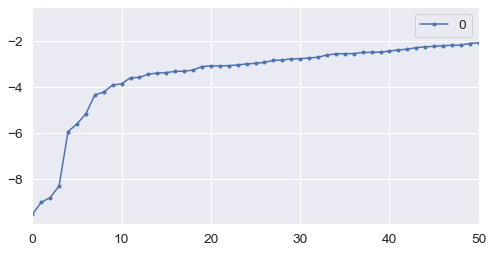

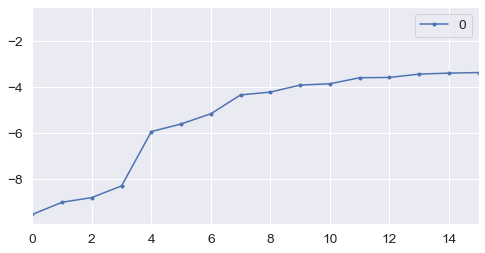

In [70]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-',figsize=(8, 4))
scores.plot(stacked=True, xlim=[0, 15], style='.-',figsize=(8, 4))
plt.show()
# elbow yöntemi---en marjinal değişimi yaşanan noktayı belirlemek daha mantıklı
# burada 7'inciden önce olanları outlierlar olarak belirledik

In [71]:
th = np.sort(df_scores)[7]
th

-4.343506550607383

In [72]:
df[df_scores < th]

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   YrSold  SalePrice  BsmtFinType1_Unf  HasWoodDeck  HasOpenPorch  \
249       50.000      375.600 159000.000        6.000        7.000   1958.000      2006.000     472.000     697.000       0.000    747.000     1444.000  1444.000   700.000         0.000   2144.000         0.000         1.000     2.000     0.000         4.000         1.000         7.000       2.000     1958.000       2.000     389.000       0.000       98.000          0.000      0.000        0.000     0.000  500.000   6.000 2007.000      0.367             0.000        1.000         0.000   
313       20.000      150.000 215245.000        7.000        5.000   1965.000      1965.000      54.598    1236.000     820.000     80.000     2136.000  2036.000   665.142         0.000   2036.000         2.000         0.000     2.000     0.000         3.000         1.000         8.000       2.000     1965.000       2.000     513.000       0.000        0.000          0.000      0.000        0.000     0.000    0.000   6.000 2009.000      0.497             0.000        1.000         1.000   
335      190.000      375.600 164660.000        5.000        6.000   1965.000      1965.000      54.598    1249.000     147.000    103.000     1499.000  1619.000   167.000         0.000   1786.000         2.000         0.000     2.000     0.000         3.000         1.000         7.000       2.000     1965.000       2.000     529.000     670.000        0.000          0.000      0.000        0.000     0.000  700.000   8.000 2008.000      0.303             0.000        0.000         1.000   
451       20.000       62.000  70761.000        7.000        5.000   1975.000      1975.000      54.598     655.000       0.000    878.000     1533.000  1533.000   665.142         0.000   1533.000         1.000         0.000     2.000     0.000         2.000         1.000         5.000       2.000     1975.000       2.000     576.000     200.000       54.000          0.000      0.000        0.000     0.000    0.000  12.000 2006.000      0.371             0.000        0.000         0.000   
706       20.000      375.600 115149.000        7.000        5.000   1971.000      2002.000     351.000    1219.000       0.000    424.000     1643.000  1824.000   665.142         0.000   1824.000         1.000         0.000     2.000     0.000         2.000         1.000         5.000       2.000     1971.000       2.000     739.000     380.000       48.000          0.000      0.000        0.000     0.000    0.000   6.000 2007.000      0.400             0.000        0.000         0.000   
1298      60.000      313.000  63887.000       10.000        5.000   2008.000      2008.000     796.000    5644.000       0.000    466.000     6110.000  4692.000   950.000         0.000   5642.000         2.000         0.000     2.000     1.000         3.000         1.000        12.000       3.000     2008.000       2.000    1418.000     214.000      292.000          0.000      0.000        0.000   480.000    0.000   1.000 2008.000      0.212             0.000        0.000         0.000   
1396      20.000      375.600  57200.000        5.000        5.000   1948.000      1950.000      54.598     353.000     334.000     60.000      747.000  1687.000   665.142         0.000   1687.000         1.000         0.000     1.000     0.000         3.000         1.000         7.000       2.000     1966.000       2.000     572.000       0.000        0.000         50.000      0.000        0.000     0.000    0.000   6.000 2010.000      0.212             0.000        1.000         1.000   

      HasEnclosedPorch  Has3SsnPorch  HasScre

In [73]:
df[df_scores < th].shape

(7, 304)

In [74]:
# outlier olanları sildik. tercihe göre silinmeyebilir. 
# Sadece ağaç yöntemleri kullanılmak istenirse için silinmesine gerek yoktur
df.drop(axis=0, labels=df[df_scores < th].index,inplace=True) 
df

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold   YrSold  SalePrice  BsmtFinType1_Unf  HasWoodDeck  HasOpenPorch  \
0         60.000       65.000  8450.000        7.000        5.000   2003.000      2003.000     196.000     706.000       0.000    150.000      856.000   856.000   854.000         0.000   1710.000         1.000         0.000     2.000     1.000         3.000         1.000         8.000       0.000     2003.000       2.000     548.000       0.000       61.000          0.000      0.000        0.000     0.000    0.000   2.000 2008.000      0.276             0.000        1.000         0.000   
1         20.000       80.000  9600.000        6.000        8.000   1976.000      1976.000      54.598     978.000       0.000    284.000     1262.000  1262.000   665.142         0.000   1262.000         0.000         1.000     2.000     0.000         3.000         1.000         6.000       1.000     1976.000       2.000     460.000     298.000        0.000          0.000      0.000        0.000     0.000    0.000   5.000 2007.000      0.240             0.000        0.000         1.000   
2         60.000       68.000 11250.000        7.000        5.000   2001.000      2002.000     162.000     486.000       0.000    434.000      920.000   920.000   866.000         0.000   1786.000         1.000         0.000     2.000     1.000         3.000         1.000         6.000       1.000     2001.000       2.000     608.000       0.000       42.000          0.000      0.000        0.000     0.000    0.000   9.000 2008.000      0.296             0.000        1.000         0.000   
3         70.000       60.000  9550.000        7.000        5.000   1915.000      1970.000      54.598     216.000       0.000    540.000      756.000   961.000   756.000         0.000   1717.000         1.000         0.000     1.000     0.000         3.000         1.000         7.000       1.000     1998.000       3.000     642.000       0.000       35.000        272.000      0.000        0.000     0.000    0.000   2.000 2006.000      0.185             0.000        1.000         0.000   
4         60.000       84.000 14260.000        8.000        5.000   2000.000      2000.000     350.000     655.000       0.000    490.000     1145.000  1145.000  1053.000         0.000   2198.000         1.000         0.000     2.000     1.000         4.000         1.000         9.000       1.000     2000.000       3.000     836.000     192.000       84.000          0.000      0.000        0.000     0.000    0.000  12.000 2008.000      0.331             0.000        0.000         0.000   
...          ...          ...       ...          ...          ...        ...           ...         ...         ...         ...        ...          ...       ...       ...           ...        ...           ...           ...       ...       ...           ...           ...           ...         ...          ...         ...         ...         ...          ...            ...        ...          ...       ...      ...     ...      ...        ...               ...          ...           ...   
1455      60.000       62.000  7917.000        6.000        5.000   1999.000      2000.000      54.598     665.142       0.000    953.000      953.000   953.000   694.000         0.000   1647.000         0.000         0.000     2.000     1.000         3.000         1.000         7.000       1.000     1999.000       2.000     460.000       0.000       40.000          0.000      0.000        0.000     0.000    0.000   8.000 2007.000      0.232             1.000        1.000         0.000   
1456      20.000       85.000 13175.000        6.000  

# Correlation Analysis

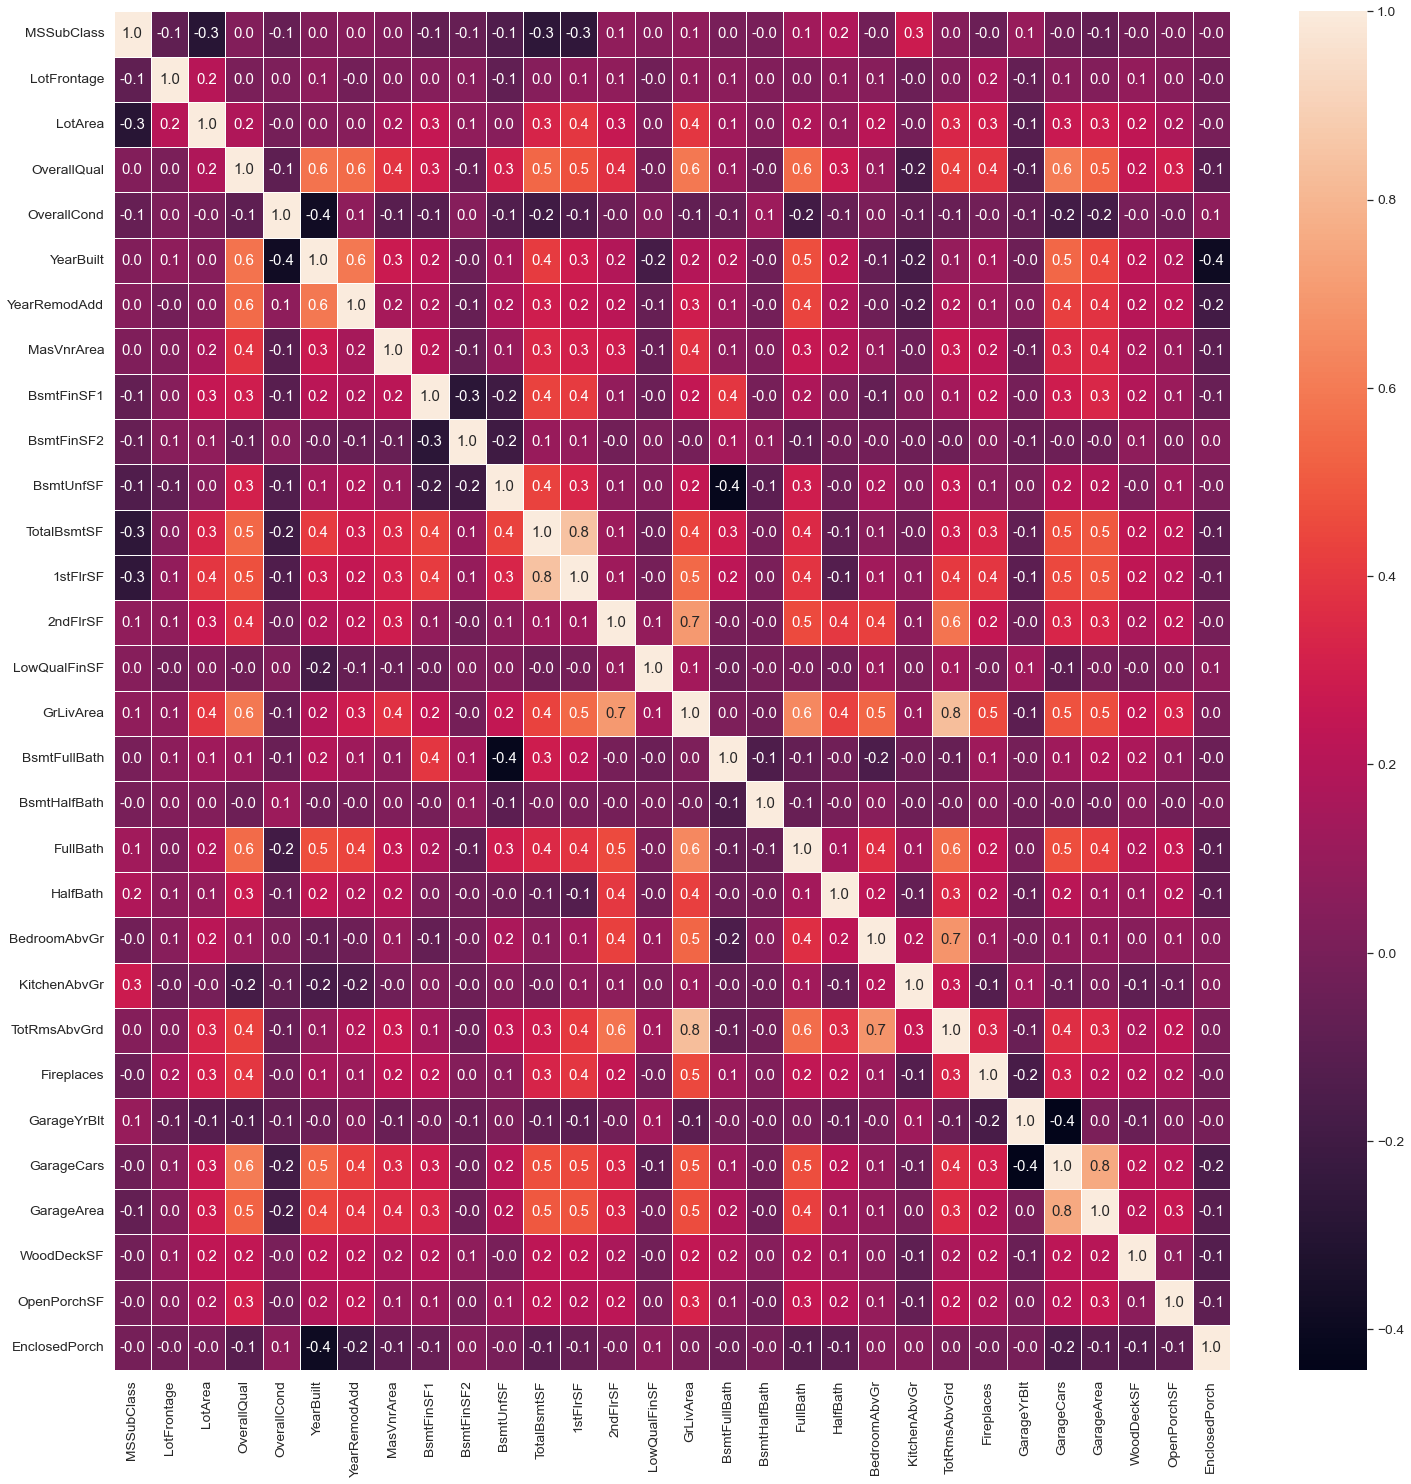

In [75]:
df_corr=df.corr()
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df[df.columns[:30]].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [76]:
corr_abs=df_corr.copy()
corr_abs = corr_abs.unstack()
corr_abs_sorted = corr_abs.sort_values(kind="quicksort")  #.sort_values(ascending = False)
corr_abs_sorted=pd.DataFrame(corr_abs_sorted)
corr_abs_sorted=corr_abs_sorted.iloc[range(0,len(corr_abs_sorted),2)].reset_index().sort_values(0)  # çoklama olanları siliyoruz
corr_abs_sorted.columns=["col1","col2","corr"]
corr_abs_sorted=corr_abs_sorted[corr_abs_sorted["col1"]!=corr_abs_sorted["col2"]] # burada col1 ile col2 aynı olanları siliyoruz

corr_abs_sorted  # unique kolonlara sahip korelasyonları elde ettik.

col1               col2   corr
0      FireplaceQu_nan_value       hasfireplace -1.000
1               YearRemodAdd  YearsSinceRemodel -0.998
2          YearsSinceRemodel   YearRemodAdd_log -0.998
3          YearsSinceRemodel    YearRemodAdd_sq -0.998
4             HasScreenPorch    ScreenPorch_log -0.997
...                      ...                ...    ...
46203  SaleCondition_Abnorml        has2ndfloor    NaN
46204  SaleCondition_AdjLand        has2ndfloor    NaN
46205   SaleCondition_Family        has2ndfloor    NaN
46206   SaleCondition_Normal        has2ndfloor    NaN
46207  SaleCondition_Partial        has2ndfloor    NaN

[46057 rows x 3 columns]

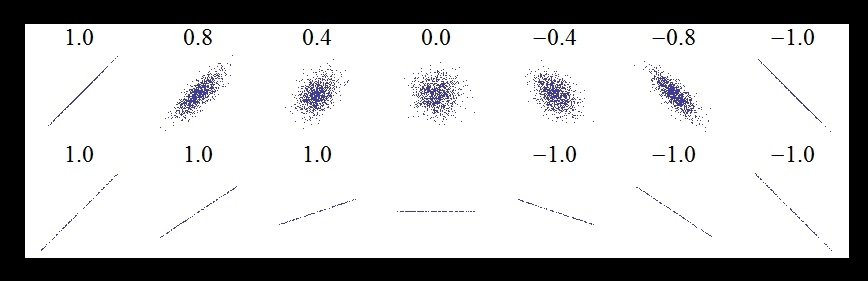

In [77]:
Image("corr2.jpg")

In [78]:
# burada hedef değişkeni buradan muaf tutmamız çok önemli. aksi takdirde en önemli değişkenleri kaybedebiliriz.
del_for_corr=corr_abs_sorted[(corr_abs_sorted["corr"]>0.5)|(corr_abs_sorted["corr"]<-0.5)][(corr_abs_sorted["col1"]!=target)&(corr_abs_sorted["col2"]!=target)]
del_for_corr

col1               col2   corr
0      FireplaceQu_nan_value       hasfireplace -1.000
1               YearRemodAdd  YearsSinceRemodel -0.998
2          YearsSinceRemodel   YearRemodAdd_log -0.998
3          YearsSinceRemodel    YearRemodAdd_sq -0.998
4             HasScreenPorch    ScreenPorch_log -0.997
...                      ...                ...    ...
45446           1stFlrSF_log    1stFlrSF_log_sq  1.000
45447                haspool       PoolArea_log  1.000
45448       YearRemodAdd_log    YearRemodAdd_sq  1.000
45449           YearRemodAdd   YearRemodAdd_log  1.000
45450        YearRemodAdd_sq       YearRemodAdd  1.000

[373 rows x 3 columns]

In [79]:
# korelasyonu yüksek olan kolonlardan sadece birini saklayıp diğerlerini siliyoruz
unique_corr=[]
del_for_corr_list=[]
for col in del_for_corr["col1"].values:
    if (col not in del_for_corr_list )and (col not in unique_corr) :
        unique_corr.append(col)
        del_for_corr_list+=list(del_for_corr[del_for_corr["col1"]==col]["col2"].values)

del_for_corr_list=list(set(del_for_corr_list))  

unique_corr[:5],"----------",del_for_corr_list[:5],"----------",len(del_for_corr_list) # 117 adet kolonun korelasyonu aşırı yüksek çıktı.

(['FireplaceQu_nan_value',
  'YearRemodAdd',
  'HasScreenPorch',
  '3SsnPorch_log',
  'HasEnclosedPorch'],
 '----------',
 ['Exterior1st_BrkFace',
  'GarageCars_log_sq',
  'GarageCars_log',
  'LandContour_HLS',
  'BsmtFinType2_nan_value'],
 '----------',
 117)

In [80]:
del_for_corr_list2=[]
for col in del_for_corr_list:
    if col !=target:
        del_for_corr_list2.append(col)

In [81]:
#we deactivated it because it negatively affected the model success.
# df.drop(del_for_corr_list2,axis=1,inplace=True)
# df

In [82]:
# burada önemli olabilecek kolonları görebiliriz.
corr_abs_sorted[(corr_abs_sorted["col1"]==target)|(corr_abs_sorted["col2"]==target)]

col1                   col2   corr
43          ExterQual_TA              SalePrice -0.595
69        KitchenQual_TA              SalePrice -0.522
71     YearsSinceRemodel              SalePrice -0.513
92             SalePrice  FireplaceQu_nan_value -0.471
152         HasOpenPorch              SalePrice -0.415
...                  ...                    ...    ...
45365        OverallQual              SalePrice  0.795
45371            TotalSF              SalePrice  0.819
45638          SalePrice            has2ndfloor    NaN
45671        has2ndfloor              SalePrice    NaN
45938   RoofMatl_ClyTile              SalePrice    NaN

[304 rows x 3 columns]

# Scaler

In [83]:
# değişkenlerin standartlatırılması
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  BsmtFinType1_Unf  HasWoodDeck  HasOpenPorch  \
0       0.235        0.124    0.137        0.667        0.500      0.949         0.883       0.122       0.312       0.000      0.064        0.242     0.180     0.381         0.000      0.317         0.333         0.000     0.667     0.500         0.375         0.333         0.500       0.000        0.201       0.500       0.315       0.000        0.112          0.000      0.000        0.000     0.000    0.000   0.091   0.500      0.241             0.000        1.000         0.000   
1       0.000        0.166    0.159        0.556        0.875      0.754         0.433       0.034       0.432       0.000      0.122        0.373     0.321     0.284         0.000      0.214         0.000         0.500     0.667     0.000         0.375         0.333         0.333       0.333        0.148       0.500       0.244       0.348        0.000          0.000      0.000        0.000     0.000    0.000   0.364   0.250      0.204             0.000        0.000         1.000   
2       0.235        0.133    0.191        0.667        0.500      0.935         0.867       0.101       0.214       0.000      0.186        0.263     0.202     0.387         0.000      0.334         0.333         0.000     0.667     0.500         0.375         0.333         0.333       0.333        0.197       0.500       0.364       0.000        0.077          0.000      0.000        0.000     0.000    0.000   0.727   0.500      0.262             0.000        1.000         0.000   
3       0.294        0.110    0.158        0.667        0.500      0.312         0.333       0.034       0.095       0.000      0.231        0.210     0.217     0.330         0.000      0.319         0.333         0.000     0.333     0.000         0.375         0.333         0.417       0.333        0.191       0.750       0.392       0.000        0.064          0.493      0.000        0.000     0.000    0.000   0.091   0.000      0.146             0.000        1.000         0.000   
4       0.235        0.178    0.248        0.778        0.500      0.928         0.833       0.218       0.289       0.000      0.210        0.335     0.280     0.482         0.000      0.429         0.333         0.000     0.667     0.500         0.500         0.333         0.583       0.333        0.195       0.750       0.550       0.224        0.154          0.000      0.000        0.000     0.000    0.000   1.000   0.500      0.299             0.000        0.000         0.000   

   HasEnclosedPorch  Has3SsnPorch  HasScreenPorch  YearsSinceRemodel  Total_Home_Quality  TotalSF  YrBltAndRemod  Total_sqr_footage  Total_Bathrooms  Total_porch_sf  ...  KitchenQual_TA  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  FireplaceQu_Ex  FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_Po  FireplaceQu_nan_value  GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageFinish_Fin  \
0             1.000         1.000           1.000              0.098               0.588    0.298          0.926              0.315            0.500           0.059  ...           0.000            0.000            0.000            0.000           0.000           0.000           1.000           0.000           0.000           0.000           0.000                  1.000              1.000               0.000               0.000               0.000              0.000             0.000   
1             1.000         1.000           1.000              0.525               0.7

In [84]:
#############################################
# train_test_split
#############################################
df.replace([np.inf, -np.inf], 1, inplace=True)
df=df.fillna(0)


y = df[target]
X = df.drop([ target], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)


In [85]:

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=2)
    return pred.mean()

def print_evaluate(y_test, predicted):  
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('_____________________________________')
    
def evaluate(y_test, predicted):
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    return mae, mse, rmse, r2_square

In [86]:
def model_evaluation(model,model_0,results_df,pred_df,model_names,model_name=""):
    if model_name=="":
        model_name=str(model).split("(")[0]
    
    if model_name=="Pipeline":
        model_name+="_"+str(model).split("\n")[1].split("'")[1]
    
    if model_name in list(pred_df.columns):
        if (model_name+"_2") not in list(pred_df.columns):
            model_name+="_2"
        elif (model_name+"_3") not in list(pred_df.columns):
            model_name+="_3"  
        else:
            model_name+="_4"
    model_names.append(model_name)
    
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    pred_df[model_name]=test_pred
    
    print("#"*50,model_name,"#"*50)

    print('Test set evaluation:',model_name,'\n_____________________________________')
    print_evaluate(y_test, test_pred)

    print('Train set evaluation:',model_name,'\n_____________________________________')
    print_evaluate(y_train, train_pred)
    
    
    
    if ("keras" in model_name) or ("Artficial" in model_name):
        results_df_2 = pd.DataFrame(data=[[model_name, *evaluate(y_test, test_pred), 0]], 
                                columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    else:
        results_df_2 = pd.DataFrame(data=[[model_name, *evaluate(y_test, test_pred), cross_val(model_0)]], 
                                    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    results_df = results_df.append(results_df_2, ignore_index=True)
    
    plt.figure(figsize=(8,4))
    plt.scatter(y_test,test_pred, c= 'brown')
    plt.xlabel('Y Test')
    plt.ylabel(model_name)
    plt.show()

    return results_df,pred_df,model_names
#model_evaluation(rf_reg,results_df)

In [87]:
################################################
# Feature Importance
################################################

def plot_importance(model,model_name, features, num=8, save=False):
    try:
        feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
        plt.figure(figsize=(4, 4))
        sns.set(font_scale=1)
        sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                         ascending=False)[0:8])
        if model_name:
            plt.title(model_name)
            plt.tight_layout()
            plt.show()
        else:
            plt.title('Features')
            plt.tight_layout()
            plt.show()

        if save:
            plt.savefig('importances.png')
    except:
        pass
        #print(model_name, ": böyle bir özelliğe sahip değildir")

In [88]:
def single_model_scores(model,):
    #model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    
    print('Train set evaluation:\n_____________________________________')
    print_evaluate(y_train, train_pred)

    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_test, test_pred)

    
    results_df_single = pd.DataFrame(data=[["model", *evaluate(y_test, test_pred),  cross_val(model)]], 
                                columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    #results_df_single = results_df.append(results_df_single2, ignore_index=True)

    return results_df_single
    
    

In [89]:
def single_model_test_scores(test_pred,model_name="model"):
    
    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_test, test_pred)

   
    results_df_single = pd.DataFrame(data=[[model_name, *evaluate(y_test, test_pred),  0]], 
                                columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
    #results_df_single = results_df.append(results_df_single2, ignore_index=True)

    return results_df_single
    
    

################################
# Hyperparameter Optimization with RandomSearchCV 
################################

In [90]:
################################
# Hyperparameter Optimization with RandomSearchCV 
################################

rf_model = RandomForestRegressor(random_state=17)
#n_estimators 200-15000(1000-2000 genelde iyi olur)
rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=10,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

#rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X_train, y_train)
print(rf_random.best_params_)
single_model_scores(rf_random)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 488, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 36}
Test set evaluation:
_____________________________________
MAE: 0.024408961197716943
MSE: 0.0016036185794064241
RMSE: 0.040045206697012115
R2 Square 0.8709474967010356
_____________________________________
Train set evaluation:
_____________________________________
MAE: 0.008708448141579762
MSE: 0.0002367336108175216
RMSE: 0.01538614996734146
R2 Square 0.9803004338751226
_____________________________________
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


Model   MAE   MSE  RMSE  R2 Square  Cross Validation
0  model 0.024 0.002 0.040      0.871             0.851

In [91]:


dtree_model_params = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
               }
            
dtree_model = DecisionTreeRegressor()


dtree_model=RandomizedSearchCV(estimator=dtree_model,
                               param_distributions= dtree_model_params,
                               n_iter=10,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)


dtree_model.fit(X_train, y_train)
print(dtree_model.best_params_)
single_model_scores(dtree_model)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'min_samples_split': 30, 'max_leaf_nodes': 18, 'max_features': 12, 'max_depth': 8}
Test set evaluation:
_____________________________________
MAE: 0.040826656922919535
MSE: 0.003659044181875792
RMSE: 0.06049003374007814
R2 Square 0.7055354574855517
_____________________________________
Train set evaluation:
_____________________________________
MAE: 0.036864302544160045
MSE: 0.0027803401546420492
RMSE: 0.05272893090744444
R2 Square 0.7686365931019322
_____________________________________
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


Model   MAE   MSE  RMSE  R2 Square  Cross Validation
0  model 0.041 0.004 0.060      0.706             0.671

In [92]:
knn_params = {'n_neighbors' : [3,4,5,6,7,8,9,10,11,12,13,14,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

knn_model=KNeighborsRegressor()
knn_model=RandomizedSearchCV(estimator=knn_model,
                               param_distributions= knn_params,
                               n_iter=1000,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)


knn_model.fit(X_train, y_train)
print(knn_model.best_params_)
single_model_scores(knn_model)

Fitting 3 folds for each of 78 candidates, totalling 234 fits
{'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'ball_tree'}
Test set evaluation:
_____________________________________
MAE: 0.03130076939750048
MSE: 0.002357636191881853
RMSE: 0.048555496000780934
R2 Square 0.8102673189635833
_____________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
_____________________________________
Fitting 3 folds for each of 78 candidates, totalling 234 fits
Fitting 3 folds for each of 78 candidates, totalling 234 fits


Model   MAE   MSE  RMSE  R2 Square  Cross Validation
0  model 0.031 0.002 0.049      0.810             0.758

In [93]:
knn_params={'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'ball_tree'}

knn_model_final = KNeighborsRegressor(**knn_params).fit(X_train, y_train)

In [94]:
xgb_regxx = xgboost.XGBRegressor()
xgb_param_grid = {'model__subsample': np.arange(0.1, 1, 0.1),
                  'model__max_depth': np.arange(2,10,1),
                  'model__colsample_bytree': np.arange(0.1, 1.05, 0.05),
                  'model__eta': [0.001,0.01,0.1],
                  'model__min_child_weight' : np.arange(1,10,1),
                  'model__n_estimators' : [2000,3000],
                  'model__reg_alpha' : np.arange(0.1, 1, 0.1)
                 }
xgb_regxx = RandomizedSearchCV(estimator=xgb_regxx,
                               param_distributions=xgb_param_grid,
                               n_iter=10,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

xgb_regxx.fit(X_train, y_train)

# xgb_reg_final = rf_model.set_params(**xgb_regxx.best_params_, random_state=17).fit(X_train, y_train)

print(xgb_regxx.best_params_)
single_model_scores(xgb_regxx)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[18:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "model__colsample_bytree", "model__eta", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__reg_alpha", "model__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'model__subsample': 0.9, 'model__reg_alpha': 0.6, 'model__n_estimators': 3000, 'model__min_child_weight': 6, 'model__max_depth': 5, 'model__eta': 0.01, 'model__colsample_bytree': 0.25000000000000006}
Test set evaluation:
_____________________________________
MAE: 0.02257115341398236
MSE: 0.0011824921943828903
RMSE: 0.03438738423292604
R2 Square 0.9048379834355103
________________

Model   MAE   MSE  RMSE  R2 Square  Cross Validation
0  model 0.023 0.001 0.034      0.905             0.834

# Models

In [95]:
#####################################################################################################################################################

# Setup cross validation folds
kf = KFold(n_splits=5, random_state=42, shuffle=True)

#####################################################################################################################################################

# XGBRegressor
xgb_reg = xgboost.XGBRegressor()

# XGBoost Regressor
params={'model__subsample': 0.9,
 'model__reg_alpha': 0.6,
 'model__n_estimators': 3000,
 'model__min_child_weight': 6,
 'model__max_depth': 5,
 'model__eta': 0.01,
 'model__colsample_bytree': 0.25}
xgb_reg2 = XGBRegressor(**params)
#####################################################################################################################################################
# Light Gradient Boosting Regressor
lightgbm_reg = LGBMRegressor()

# Light Gradient Boosting Regressor
lightgbm_reg2 = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
#####################################################################################################################################################
#GradientBoostingRegressor
GBR_model = ensemble.GradientBoostingRegressor()


#GradientBoostingRegressor
GBR_model_params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
GBR_model2 = ensemble.GradientBoostingRegressor(**GBR_model_params)


#####################################################################################################################################################
#Random Forest Regressor
rf_reg_model = RandomForestRegressor( random_state=17)

#Random Forest Regressor
rf_reg_model_params={'n_estimators': 1211,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 43}
rf_reg_model2 = RandomForestRegressor(**rf_reg_model_params, random_state=17)

rf_reg_model_params={'n_estimators': 1500,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 18}

rf_reg_model3 = RandomForestRegressor(**rf_reg_model_params, random_state=17)
#####################################################################################################################################################
#Ridge Regression
Ridge_model = Ridge()

#Ridge Regression
Ridge_model2 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)


# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
Ridge_pipeline_model = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

#####################################################################################################################################################

#Support Vector Machine
svm_reg_model = SVR()

#Support Vector Machine
svm_reg_model2 = SVR(kernel='rbf', C=1000000, epsilon=0.001)


# Support Vector Regressor
svm_reg_pipeline_model = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

#####################################################################################################################################################
# KNN
knn_params={'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'ball_tree'}
knn_model=KNeighborsRegressor(**knn_params)

#####################################################################################################################################################
dtree_model_params={'min_samples_split': 20,
 'max_leaf_nodes': None,
 'max_features': 14,
 'max_depth': 7}
dtree_model = DecisionTreeRegressor(**dtree_model_params)
#####################################################################################################################################################

#Stochastic Gradient Descent
sgd_reg_model = SGDRegressor()

#####################################################################################################################################################

models=[xgb_reg,xgb_reg2,lightgbm_reg,lightgbm_reg2,GBR_model,GBR_model2,rf_reg_model,rf_reg_model2,rf_reg_model3,
        svm_reg_model,svm_reg_model2,svm_reg_pipeline_model,knn_model,dtree_model,sgd_reg_model]

models_0=models.copy()

models=[model.fit(X_train, y_train) for model in models]


[18:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "model__colsample_bytree", "model__eta", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__reg_alpha", "model__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




################################################## XGBRegressor ##################################################
Test set evaluation: XGBRegressor 
_____________________________________
MAE: 0.02257115341398236
MSE: 0.0011824921943828903
RMSE: 0.03438738423292604
R2 Square 0.9048379834355103
_____________________________________
Train set evaluation: XGBRegressor 
_____________________________________
MAE: 0.0010394028386408963
MSE: 2.082723302629839e-06
RMSE: 0.0014431643366678096
R2 Square 0.9998266881273078
_____________________________________


################################################## XGBRegressor_2 ##################################################
Test set evaluation: XGBRegressor_2 
_____________________________________
MAE: 0.02257115341398236
MSE: 0.0011824921943828903
RMSE: 0.03438738423292604
R2 Square 0.9048379834355103
_____________________________________
Train set evaluation: XGBRegressor_2 
_____________________________________
MAE: 0.0010394028386408963
MSE: 2.082723302629839e-06
RMSE: 0.0014431643366678096
R2 Square 0.9998266881273078
_____________________________________
[18:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "model__colsample_bytree", "model__eta", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__reg_alpha", "model__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some

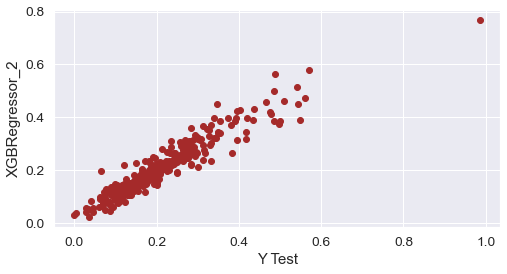

################################################## LGBMRegressor ##################################################
Test set evaluation: LGBMRegressor 
_____________________________________
MAE: 0.022421272218257234
MSE: 0.0014271229572991844
RMSE: 0.03777728096752312
R2 Square 0.8851511247624405
_____________________________________
Train set evaluation: LGBMRegressor 
_____________________________________
MAE: 0.006499716942492829
MSE: 0.0002549442934005167
RMSE: 0.015966975086111855
R2 Square 0.9787850489473803
_____________________________________


################################################## LGBMRegressor_2 ##################################################
Test set evaluation: LGBMRegressor_2 
_____________________________________
MAE: 0.020100871809718174
MSE: 0.0011061089353011056
RMSE: 0.03325821605710543
R2 Square 0.9109849880419837
_____________________________________
Train set evaluation: LGBMRegressor_2 
_____________________________________
MAE: 0.007253661010669497
MSE: 0.00010098327724949049
RMSE: 0.010049043598745628
R2 Square 0.9915967709831597
_____________________________________
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_fr

################################################## GradientBoostingRegressor ##################################################
Test set evaluation: GradientBoostingRegressor 
_____________________________________
MAE: 0.022123585834983066
MSE: 0.0011565508070185005
RMSE: 0.03400809913856551
R2 Square 0.9069256375830831
_____________________________________
Train set evaluation: GradientBoostingRegressor 
_____________________________________
MAE: 0.013341502453190645
MSE: 0.0003130502334074472
RMSE: 0.01769322563602938
R2 Square 0.9739498174673138
_____________________________________


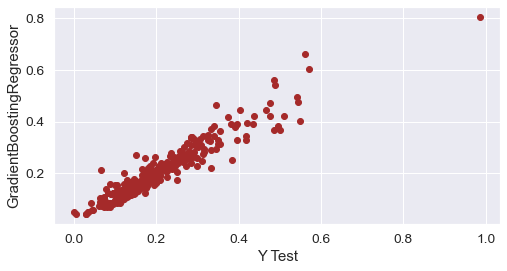

################################################## GradientBoostingRegressor_2 ##################################################
Test set evaluation: GradientBoostingRegressor_2 
_____________________________________
MAE: 0.02231584298558073
MSE: 0.0012266967175548424
RMSE: 0.03502423043486955
R2 Square 0.9012805886499067
_____________________________________
Train set evaluation: GradientBoostingRegressor_2 
_____________________________________
MAE: 0.012547992491489156
MSE: 0.0002712283145982796
RMSE: 0.016469010735265174
R2 Square 0.9774299893457612
_____________________________________


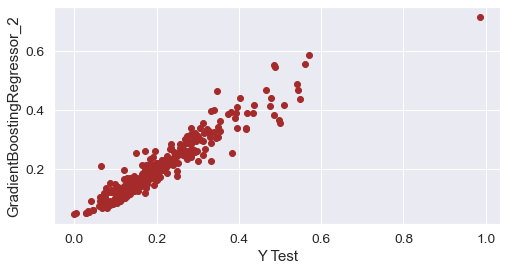

################################################## RandomForestRegressor ##################################################
Test set evaluation: RandomForestRegressor 
_____________________________________
MAE: 0.02347606296286688
MSE: 0.0012592501103697638
RMSE: 0.0354859142529788
R2 Square 0.898660828011317
_____________________________________
Train set evaluation: RandomForestRegressor 
_____________________________________
MAE: 0.008908041493573807
MSE: 0.0002454475606215642
RMSE: 0.015666766118812275
R2 Square 0.9795753106880061
_____________________________________


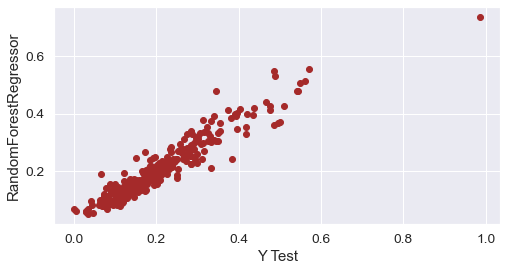

################################################## RandomForestRegressor_2 ##################################################
Test set evaluation: RandomForestRegressor_2 
_____________________________________
MAE: 0.023527677561062645
MSE: 0.0014057411843998644
RMSE: 0.0374932151782141
R2 Square 0.8868718402449516
_____________________________________
Train set evaluation: RandomForestRegressor_2 
_____________________________________
MAE: 0.008977619547837103
MSE: 0.0002608796636738105
RMSE: 0.016151769676224663
R2 Square 0.9782911426584905
_____________________________________


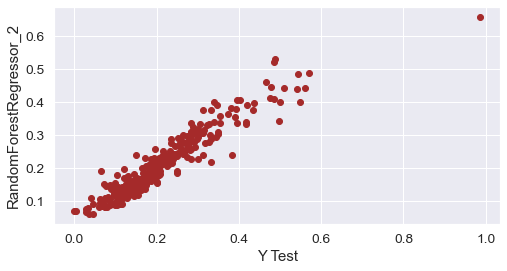

################################################## RandomForestRegressor_3 ##################################################
Test set evaluation: RandomForestRegressor_3 
_____________________________________
MAE: 0.02362828645266185
MSE: 0.0014074176234288372
RMSE: 0.03751556508209409
R2 Square 0.886736927457026
_____________________________________
Train set evaluation: RandomForestRegressor_3 
_____________________________________
MAE: 0.008486330748424137
MSE: 0.00022479435004075563
RMSE: 0.014993143434275403
R2 Square 0.9812939482998037
_____________________________________


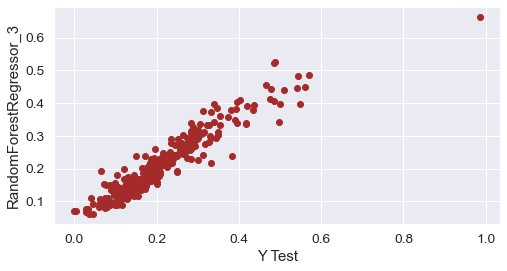

################################################## SVR ##################################################
Test set evaluation: SVR 
_____________________________________
MAE: 0.042483997247926626
MSE: 0.003196082510698714
RMSE: 0.0565339058503719
R2 Square 0.742792672738688
_____________________________________
Train set evaluation: SVR 
_____________________________________
MAE: 0.039631136332851064
MSE: 0.0023717220101835412
RMSE: 0.04870032864553936
R2 Square 0.8026393700155572
_____________________________________


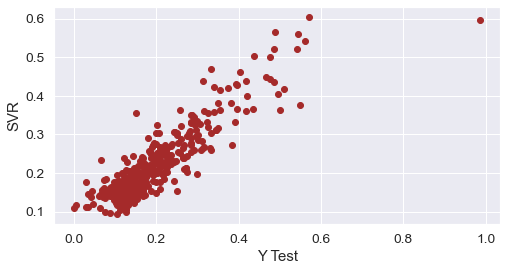

################################################## SVR_2 ##################################################
Test set evaluation: SVR_2 
_____________________________________
MAE: 0.023910442724584098
MSE: 0.0013993906897307032
RMSE: 0.037408430730661545
R2 Square 0.8873829014441461
_____________________________________
Train set evaluation: SVR_2 
_____________________________________
MAE: 0.0011171253363727904
MSE: 1.2959064658616506e-06
RMSE: 0.0011383788762365764
R2 Square 0.9998921623548607
_____________________________________


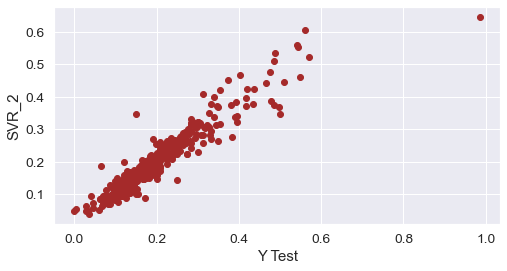

################################################## Pipeline_svr ##################################################
Test set evaluation: Pipeline_svr 
_____________________________________
MAE: 0.02051509633741872
MSE: 0.0010626034245202847
RMSE: 0.03259759844712927
R2 Square 0.914486129239564
_____________________________________
Train set evaluation: Pipeline_svr 
_____________________________________
MAE: 0.012282325305197852
MSE: 0.0008351011077356639
RMSE: 0.028898115989380066
R2 Square 0.9305078419748434
_____________________________________


################################################## KNeighborsRegressor ##################################################
Test set evaluation: KNeighborsRegressor 
_____________________________________
MAE: 0.03130076939750048
MSE: 0.002357636191881853
RMSE: 0.048555496000780934
R2 Square 0.8102673189635833
_____________________________________
Train set evaluation: KNeighborsRegressor 
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
_____________________________________


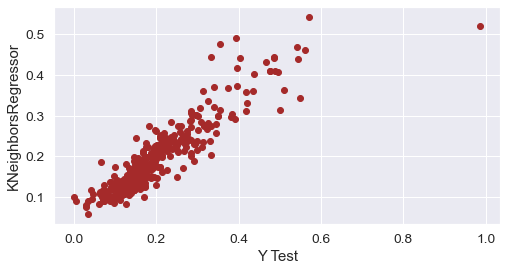

################################################## DecisionTreeRegressor ##################################################
Test set evaluation: DecisionTreeRegressor 
_____________________________________
MAE: 0.03754736367535018
MSE: 0.0033164119493604392
RMSE: 0.05758829698263736
R2 Square 0.733109063756306
_____________________________________
Train set evaluation: DecisionTreeRegressor 
_____________________________________
MAE: 0.030599999179666895
MSE: 0.0020901633760520805
RMSE: 0.045718304606055554
R2 Square 0.8260690085529354
_____________________________________


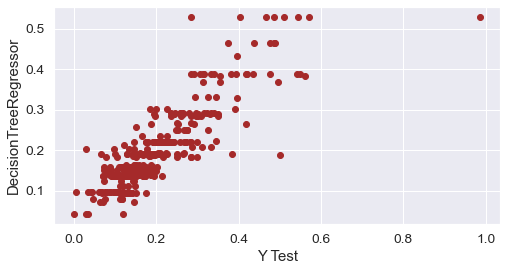

################################################## SGDRegressor ##################################################
Test set evaluation: SGDRegressor 
_____________________________________
MAE: 0.026024716597751168
MSE: 0.0018171396759980275
RMSE: 0.04262792131922488
R2 Square 0.8537642136085648
_____________________________________
Train set evaluation: SGDRegressor 
_____________________________________
MAE: 0.02505237919465032
MSE: 0.0016621786524640763
RMSE: 0.040769825268991235
R2 Square 0.8616833572448841
_____________________________________


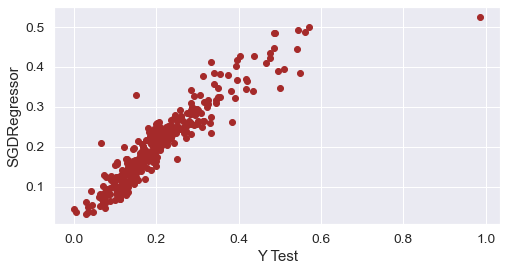

In [96]:
results_df=pd.DataFrame()
pred_df=pd.DataFrame()
model_names=[]
for i in range(len(models)):
    model=models[i]
    model_0=models_0[i]
    results_df,pred_df,model_names=model_evaluation(model,model_0,results_df,pred_df,model_names)
    


### Artficial Neural Network

In [97]:
### Artficial Neural Network
X_train2 = np.array(X_train)
X_test2= np.array(X_test)
y_train2 = np.array(y_train)
y_test2 = np.array(y_test)

keras_model = Sequential()

keras_model.add(Dense(X_train2.shape[1], activation='relu'))
keras_model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

keras_model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

keras_model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

keras_model.add(Dense(512, activation='relu'))
keras_model.add(Dropout(0.1))
keras_model.add(Dense(1))

keras_model.compile(optimizer=Adam(0.00001), loss='mse')

r = keras_model.fit(X_train2, y_train2,
              validation_data=(X_test2,y_test2),
              batch_size=1,
              epochs=30)

Epoch 1/30
1089/1089 [==============================] - 1s 990us/step - loss: 0.0101 - val_loss: 0.0046
Epoch 2/30
1089/1089 [==============================] - 1s 859us/step - loss: 0.0047 - val_loss: 0.0036
Epoch 3/30
1089/1089 [==============================] - 1s 846us/step - loss: 0.0037 - val_loss: 0.0032
Epoch 4/30
1089/1089 [==============================] - 1s 858us/step - loss: 0.0032 - val_loss: 0.0028
Epoch 5/30
1089/1089 [==============================] - 1s 857us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 6/30
1089/1089 [==============================] - 1s 989us/step - loss: 0.0023 - val_loss: 0.0027
Epoch 7/30
1089/1089 [==============================] - 1s 869us/step - loss: 0.0022 - val_loss: 0.0025
Epoch 8/30
1089/1089 [==============================] - 1s 851us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 9/30
1089/1089 [==============================] - 1s 848us/step - loss: 0.0018 - val_loss: 0.0024
Epoch 10/30
1089/1089 [==============================] - 1s 856u

In [98]:
results_df,pred_df,model_names=model_evaluation(keras_model,keras_model,results_df,pred_df,model_names,"Artficial Neural Network")

35/35 [==============================] - 0s 704us/step
################################################## Artficial Neural Network ##################################################
Test set evaluation: Artficial Neural Network 
_____________________________________
MAE: 0.029139806920025747
MSE: 0.002065838662057732
RMSE: 0.045451497907744824
R2 Square 0.8337499613848227
_____________________________________
Train set evaluation: Artficial Neural Network 
_____________________________________
MAE: 0.011162926572715323
MSE: 0.0002492961945653055
RMSE: 0.015789116332629433
R2 Square 0.9792550502120924
_____________________________________


In [99]:
results_df.set_index('Model', inplace=True)
best_models=results_df.sort_values(["R2 Square"]).iloc[-7:].index
pred_df["all_in_one"]=0
for col in best_models:
    pred_df["all_in_one"]+=pred_df[col]
pred_df["all_in_one"]/=len(best_models)

In [100]:
best_models_preds_df=single_model_test_scores(pred_df["all_in_one"],model_name="all_in_one")
best_models_preds_df

Test set evaluation:
_____________________________________
MAE: 0.020062648712710213
MSE: 0.001028552895464814
RMSE: 0.03207106009262578
R2 Square 0.9172263731290362
_____________________________________


Model   MAE   MSE  RMSE  R2 Square  Cross Validation
0  all_in_one 0.020 0.001 0.032      0.917                 0

In [101]:
results_df.loc["all_in_one"]=list(best_models_preds_df.iloc[0].values)[1:]
results_df=results_df.sort_values("R2 Square",ascending=False)
results_df

MAE   MSE  RMSE  R2 Square  Cross Validation
Model                                                                     
all_in_one                  0.020 0.001 0.032      0.917             0.000
Pipeline_svr                0.021 0.001 0.033      0.914             0.877
LGBMRegressor_2             0.020 0.001 0.033      0.911             0.879
GradientBoostingRegressor   0.022 0.001 0.034      0.907             0.886
XGBRegressor_2              0.023 0.001 0.034      0.905             0.834
XGBRegressor                0.023 0.001 0.034      0.905             0.834
GradientBoostingRegressor_2 0.022 0.001 0.035      0.901             0.880
RandomForestRegressor       0.023 0.001 0.035      0.899             0.866
SVR_2                       0.024 0.001 0.037      0.887             0.866
RandomForestRegressor_2     0.024 0.001 0.037      0.887             0.866
RandomForestRegressor_3     0.024 0.001 0.038      0.887             0.865
LGBMRegressor               0.022 0.001 0.038      0.885             0.872
SGDRegressor                0.026 0.002 0.043      0.854             0.836
Artficial Neural Network    0.029 0.002 0.045      0.834             0.000
KNeighborsRegressor         0.031 0.002 0.049      0.810             0.752
SVR                         0.042 0.003 0.057      0.743             0.673
DecisionTreeRegressor       0.038 0.003 0.058      0.733             0.660

In [102]:
# we achieved the best result by bringing together successful models

In [103]:
pred_df

XGBRegressor  XGBRegressor_2  LGBMRegressor  LGBMRegressor_2  GradientBoostingRegressor  GradientBoostingRegressor_2  RandomForestRegressor  RandomForestRegressor_2  RandomForestRegressor_3   SVR  SVR_2  Pipeline_svr  KNeighborsRegressor  DecisionTreeRegressor  SGDRegressor  Artficial Neural Network  all_in_one
0           0.198           0.198          0.185            0.199                      0.213                        0.212                  0.192                    0.192                    0.194 0.234  0.186         0.187                0.186                  0.189         0.209                     0.167       0.200
1           0.122           0.122          0.138            0.134                      0.130                        0.130                  0.136                    0.147                    0.148 0.177  0.127         0.125                0.110                  0.157         0.110                     0.116       0.128
2           0.256           0.256          0.239            0.247                      0.240                        0.232                  0.238                    0.241                    0.243 0.230  0.236         0.242                0.237                  0.290         0.246                     0.258       0.244
3           0.200           0.200          0.197            0.208                      0.221                        0.212                  0.203                    0.203                    0.202 0.290  0.209         0.214                0.222                  0.221         0.247                     0.201       0.208
4           0.100           0.100          0.094            0.091                      0.097                        0.101                  0.089                    0.090                    0.090 0.115  0.100         0.096                0.105                  0.079         0.088                     0.123       0.096
..            ...             ...            ...              ...                        ...                          ...                    ...                      ...                      ...   ...    ...           ...                  ...                    ...           ...                       ...         ...
359         0.352           0.352          0.313            0.326                      0.329                        0.321                  0.305                    0.277                    0.280 0.355  0.350         0.291                0.282                  0.249         0.307                     0.347       0.325
360         0.204           0.204          0.211            0.220                      0.216                        0.210                  0.206                    0.205                    0.204 0.159  0.238         0.230                0.251                  0.221         0.203                     0.215       0.213
361         0.207           0.207          0.208            0.204                      0.215                        0.208                  0.206                    0.209                    0.208 0.266  0.172         0.205                0.214                  0.221         0.225                     0.216       0.208
362         0.388           0.388          0.462            0.417                      0.402                        0.438                  0.507                    0.401                    0.397 0.377  0.460         0.465                0.343                  0.388         0.383                     0.477       0.429
363         0.277           0.277          0.280            0.279                      0.248                        0.245                  0.249                    0.255                    0.251 0.238  0.291         0.267                0.241                  0.221         0.245                     0.274       0.263

[364 rows x 17 columns]

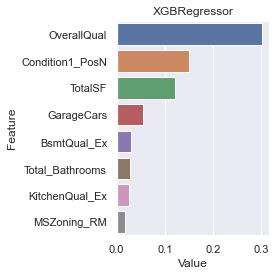

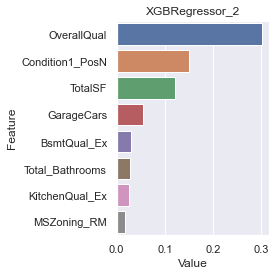

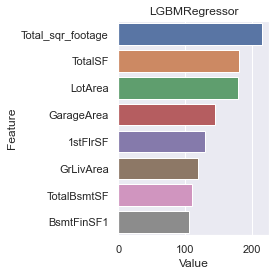

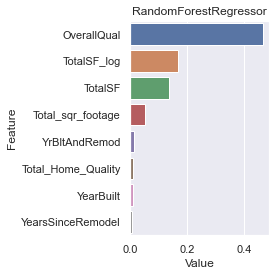

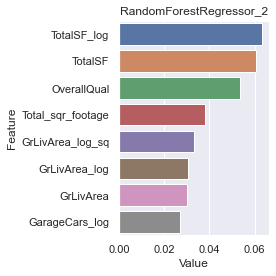

In [104]:
for i,model in enumerate(models):
    model_name=model_names[i]
    plot_importance(model,model_name, X)

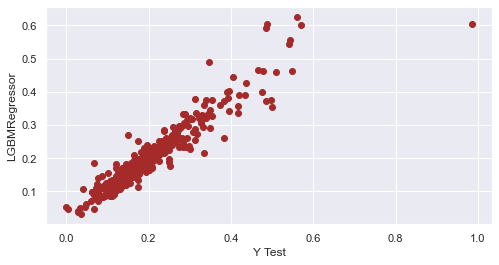

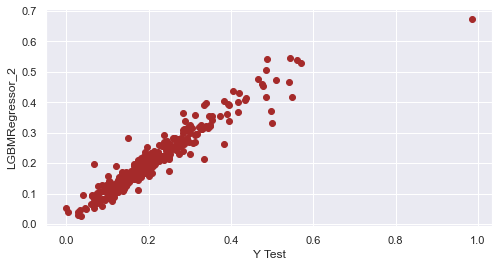

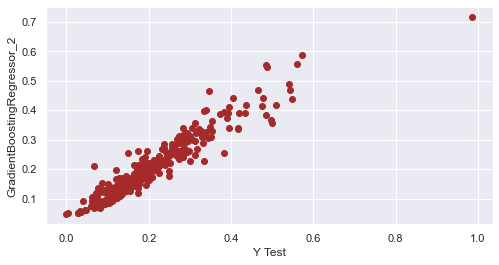

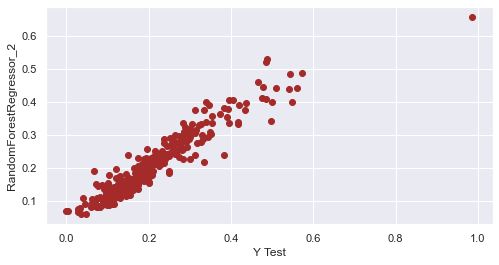

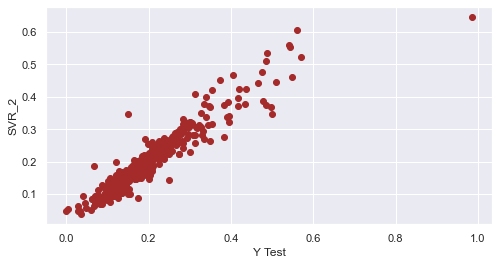

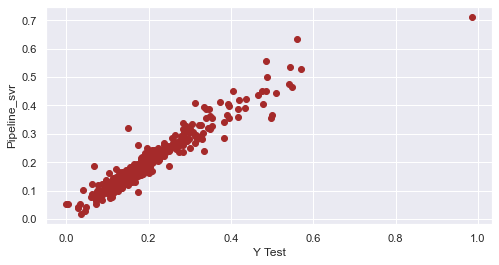

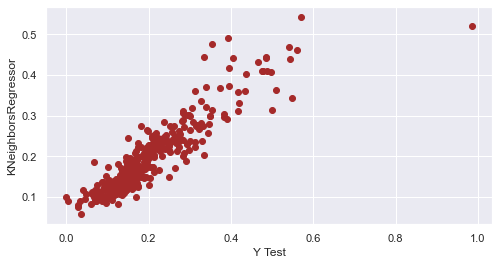

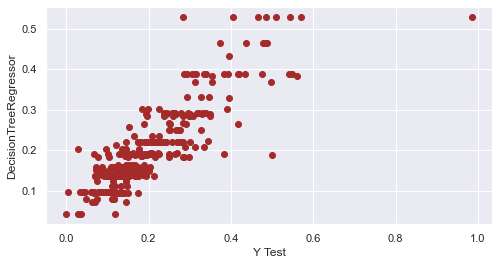

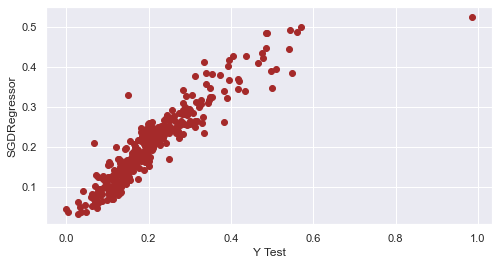

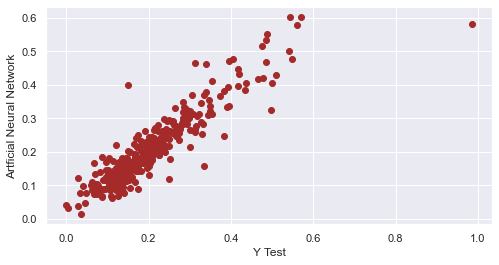

In [105]:
for col in pred_df.columns:
    pred=pred_df[col]
    
    plt.figure(figsize=(8,4))
    plt.scatter(y_test,pred, c= 'brown')
    plt.xlabel('Y Test')
    plt.ylabel(col)
    plt.show()

# Models Comparison

<AxesSubplot:ylabel='Model'>

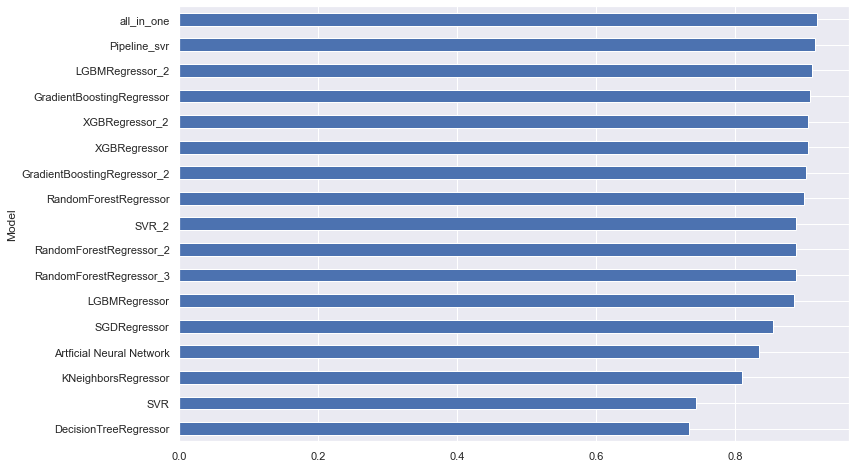

In [106]:
#results_df.set_index('Model', inplace=True)
results_df=results_df.sort_values("R2 Square")
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Conculusion

1. The new variables we obtained with feture engineering had a very positive effect on the success rate.
2. We achieved the best result by bringing together successful models

In [107]:
# References:
# https://tr.wikipedia.org/wiki/Korelasyon
# https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner
# https://www.kaggle.com/code/fatmakursun/house-price-some-of-regression-models
# https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm
# https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition